### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelBinarizer

# Show all of the data in a dataframe
pd.set_option('display.max_columns', None)

### Load Data

In [2]:
# Training Set
application_train = pd.read_csv('data/application_train.csv')
print("Loaded Training Set: {0} rows".format(application_train.shape[0]))

columns = pd.read_csv('data/HomeCredit_columns_description.csv')

Loaded Training Set: 307511 rows


In [3]:
non_numeric_features = []   # Keep a list of non-numeric features (for one-hot encoding)
numeric_features = [] # Keep a list of numeric features (for feature scaling)

### Inspect Data

#### Application Data

In [4]:
display(application_train.head(n=10))

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

### Utility Functions

In [5]:
# Visualize the contents of a non-numeric column

def explore_non_numeric(field, showDetails=True):

    # Inspired By: 
    # https://stackoverflow.com/questions/10741346/numpy-most-efficient-frequency-counts-for-unique-values-in-an-array

    unique, counts = np.unique(field, return_counts=True)
    total_records = np.size(field)

    if (showDetails): 
        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Example code from: https://matplotlib.org/examples/pie_and_polar_charts/pie_demo_features.html
    fig1, ax1 = plt.subplots()
    ax1.pie(counts, labels=unique, autopct='%1.1f%%',shadow=True, startangle=90)
    ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

In [66]:
# Visualize the contents of a numeric column

def explore_numeric(field, showUnique=False, graphType="dist", bins=20):     
    mean = np.mean(field)
    avg = np.average(field)
    
    # Take a look at the range
    print("Max: {0} Min: {1} Mean: {2} Avg: {3} Std: {4}".format(
    np.max(field),
    np.min(field),
    mean,
    avg,
    np.std(field)))

    # Unique Values
    # print("Values: {0}".format(application_train['CNT_CHILDREN'].unique()))

    if (showUnique): 
    
        unique, counts = np.unique(application_train['CNT_CHILDREN'], return_counts=True)
        total_records = np.size(application_train['CNT_CHILDREN'])

        i = 0
        while i < np.size(unique): 
            percentage = (counts[i] / total_records) * 100
            print("Value: {0} Count: {1} Percentage: {2}".format(unique[i], counts[i], percentage))
            i += 1

    # Examine distribution
    plt.figure(figsize=(15,10))
    plt.title("Distribution Graph")
    plt.axvline(avg, color="red")    # Plot the average
    plt.axvline(mean, color="green") # Plot the mean
    
    if (graphType == "hist"): 
        sns.distplot(field,bins=bins)
    else: 
        sns.distplot(field)

In [7]:
'''
Applies an in-place transformation that scales numeric features to a range of [0 .. 1] 
without changing the distribution of the data.  Accepts a List of column names
''' 
def scale_features(dataFrame, featureList): 
    
    dataFrame_transform = pd.DataFrame(data = dataFrame)
    dataFrame_transform[featureList] = scaler.fit_transform(dataFrame_transform[featureList])


#### TARGET

Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)

Value: 0 Count: 282686 Percentage: 91.92711805431351
Value: 1 Count: 24825 Percentage: 8.072881945686495


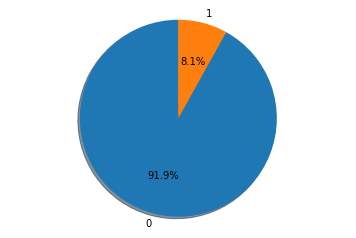

In [8]:
explore_non_numeric(application_train['TARGET'])

#### CODE_GENDER
Gender of the client

Value: F Count: 202448 Percentage: 65.83439291602576
Value: M Count: 105059 Percentage: 34.164306317497584
Value: XNA Count: 4 Percentage: 0.0013007664766463637


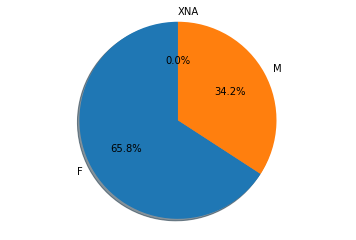

In [9]:
explore_non_numeric(application_train['CODE_GENDER'])

# Categorize it for one-hot encoding later
non_numeric_features.append('CODE_GENDER')

#### FLAG_OWN_CAR

Flag if the client owns a car

Value: N Count: 202924 Percentage: 65.98918412674668
Value: Y Count: 104587 Percentage: 34.010815873253314


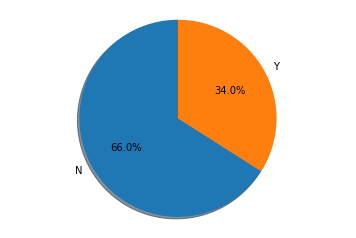

In [10]:
explore_non_numeric(application_train['FLAG_OWN_CAR'])

### Preprocessing 
This is a Y/N string field.  We'll re-encode it as a bool for easier analysis later

Value: 0 Count: 202924 Percentage: 65.98918412674668
Value: 1 Count: 104587 Percentage: 34.010815873253314


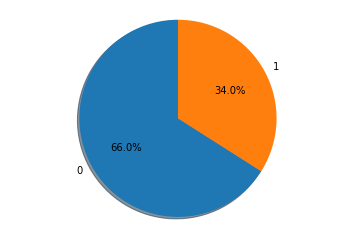

In [11]:
lb = LabelBinarizer()
bool_own_car = lb.fit_transform(application_train['FLAG_OWN_CAR'])

explore_non_numeric(bool_own_car)

# Swap the modified data with the original field
application_train['BOOL_OWN_CAR'] = bool_own_car
result = application_train.drop('FLAG_OWN_CAR',axis=1)

#### FLAG_OWN_REALTY

Flag if client owns a house or flat

Value: N Count: 94199 Percentage: 30.632725333402703
Value: Y Count: 213312 Percentage: 69.3672746665973


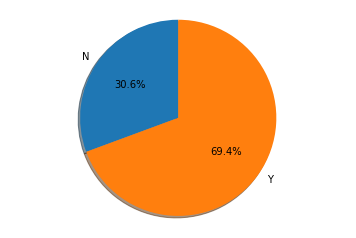

In [12]:
explore_non_numeric(application_train['FLAG_OWN_REALTY'])

# Categorize it for one-hot encoding later
non_numeric_features.append('FLAG_OWN_REALTY')

### Preprocessing 
This is a Y/N string field.  We'll re-encode it as a bool for easier analysis later

Value: 0 Count: 94199 Percentage: 30.632725333402703
Value: 1 Count: 213312 Percentage: 69.3672746665973


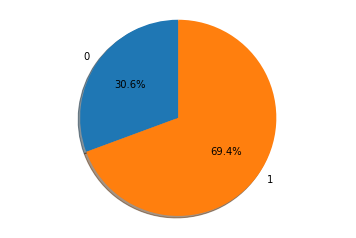

In [13]:
lb = LabelBinarizer()
bool_own_realty = lb.fit_transform(application_train['FLAG_OWN_REALTY'])

explore_non_numeric(bool_own_realty)

# Swap the modified data with the original field
application_train['BOOL_OWN_REALTY'] = bool_own_realty
result = application_train.drop('FLAG_OWN_CAR',axis=1)

### CNT_CHILDREN
Number of children the client has

Max: 19 Min: 0 Mean: 0.4170517477423572 Avg: 0.4170517477423572 Std: 0.7221202102975595


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


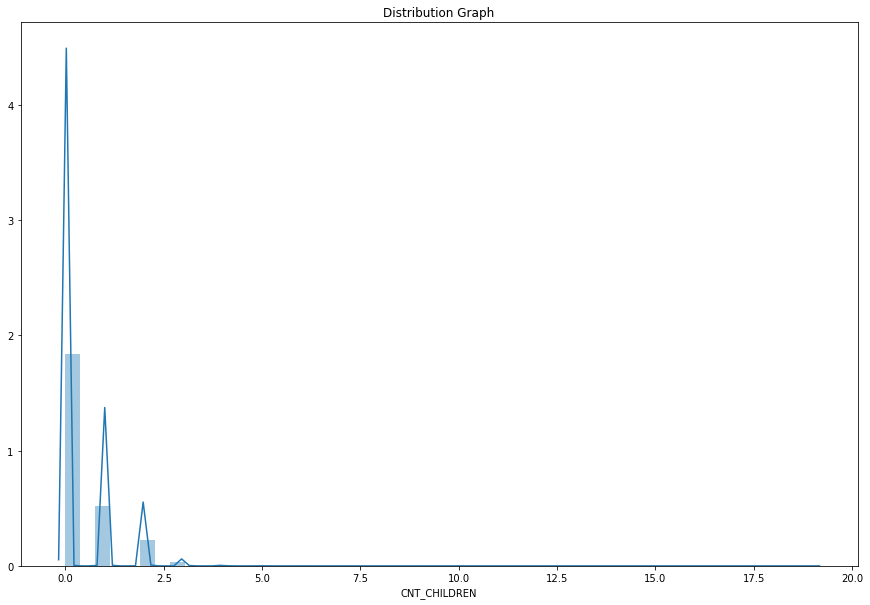

In [14]:
explore_numeric(application_train['CNT_CHILDREN'])   

#### Preprocessing: 
This feature is highly skewed, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. 

Max: 2.995732273553991 Min: 0.0 Mean: 0.25311615347965405 Avg: 0.25311615347965405 Std: 0.40593657676776573


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


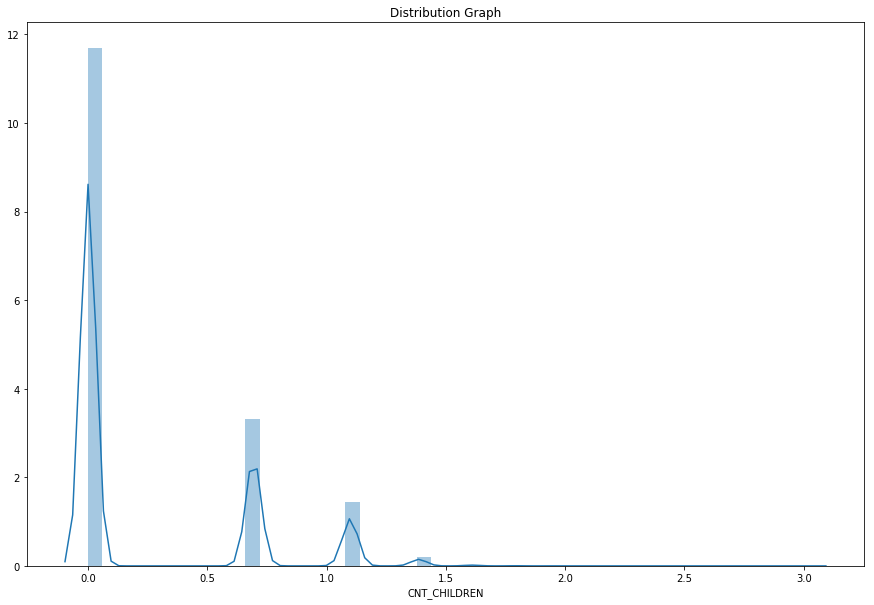

In [15]:
cnt_children = application_train['CNT_CHILDREN']
cnt_children_transformed = cnt_children.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(cnt_children_transformed)

# Swap the normalized data with the original field
application_train['CNT_CHILDREN_TRANSFORMED'] = cnt_children_transformed
result = application_train.drop('CNT_CHILDREN',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('CNT_CHILDREN_TRANSFORMED')



##### AMT_INCOME_TOTAL
Income of the client

Max: 117000000.0 Min: 25650.0 Mean: 168797.9192969845 Avg: 168797.9192969845 Std: 237122.7607262434


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


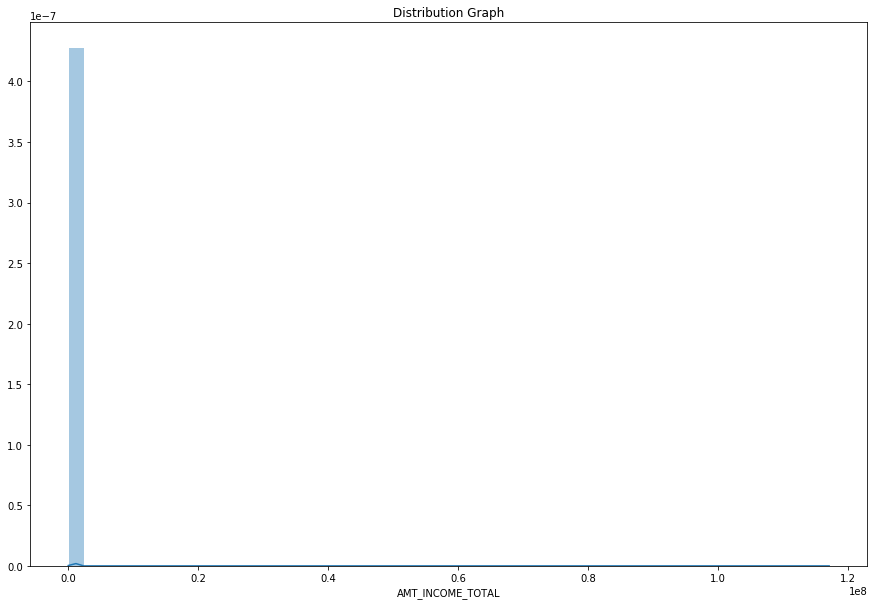

In [16]:
explore_numeric(application_train['AMT_INCOME_TOTAL'])

#### Preprocessing: 
This feature is highly skewed, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks much more like a normal distribution, with mean and average values near the peak.

Max: 18.57768450130904 Min: 10.152337836193743 Mean: 11.909245341906919 Avg: 11.909245341906919 Std: 0.4889056656307125


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


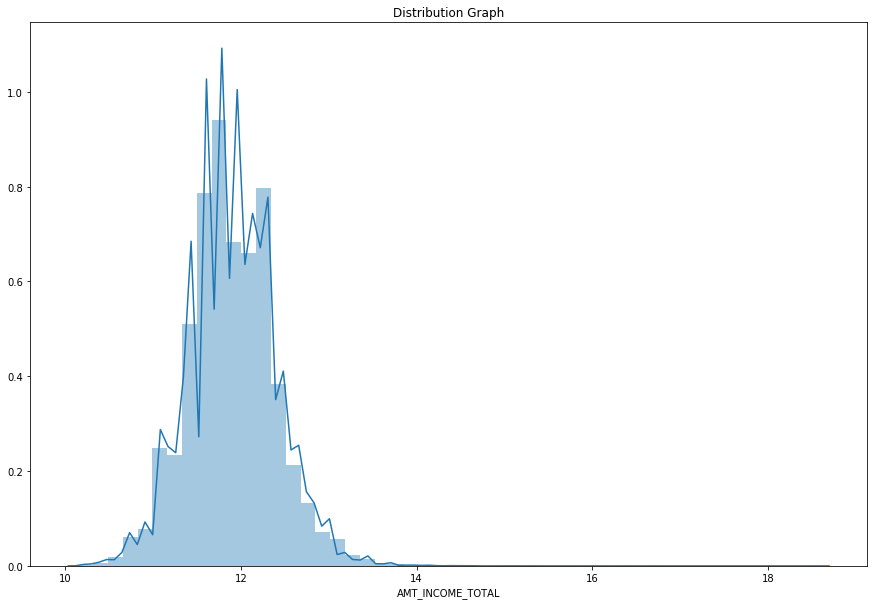

In [17]:
income_total = application_train['AMT_INCOME_TOTAL']
income_total_transformed = income_total.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(income_total_transformed)

# Swap the normalized data with the original field
application_train['AMT_INCOME_TOTAL_TRANSFORMED'] = income_total_transformed
result = application_train.drop('AMT_INCOME_TOTAL',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('AMT_INCOME_TOTAL_TRANSFORMED')

#### AMT_CREDIT
Credit amount of the loan

Max: 4050000.0 Min: 45000.0 Mean: 599025.9997057016 Avg: 599025.9997057016 Std: 402490.1225621855


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


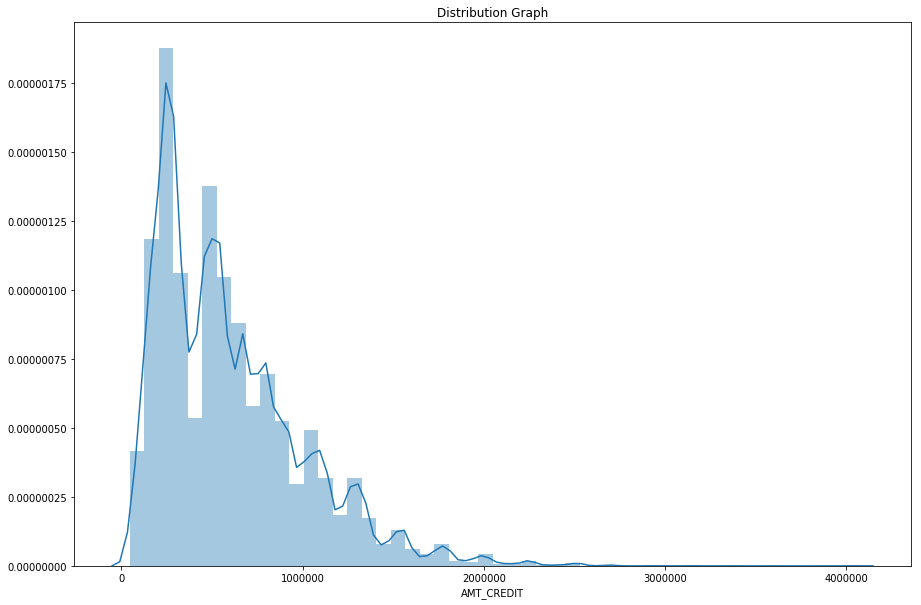

In [18]:
explore_numeric(application_train['AMT_CREDIT'])

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.214227685996272 Min: 10.714439990727769 Mean: 13.070108059483369 Avg: 13.070108059483369 Std: 0.715192195840206


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


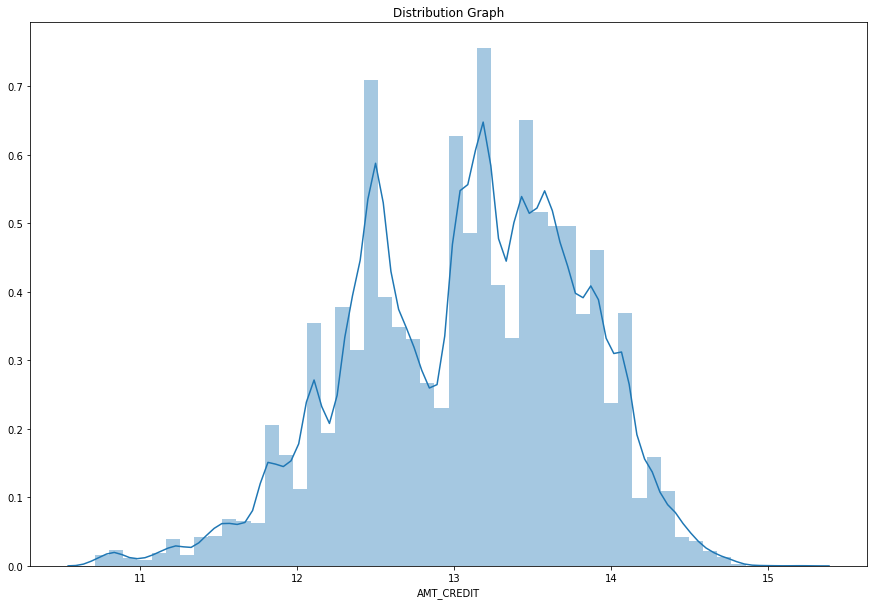

In [19]:
credit_total = application_train['AMT_CREDIT']
credit_total_transformed = credit_total.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(credit_total_transformed)

# Swap the normalized data with the original field
application_train['AMT_CREDIT_TOTAL_TRANSFORMED'] = credit_total_transformed
result = application_train.drop('AMT_CREDIT',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('AMT_CREDIT_TOTAL_TRANSFORMED')

#### AMT_ANNUITY
Loan annuity

Max: 258025.5 Min: 0.0 Mean: 27107.516051458322 Avg: 27107.516051458322 Std: 14494.420189549066


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


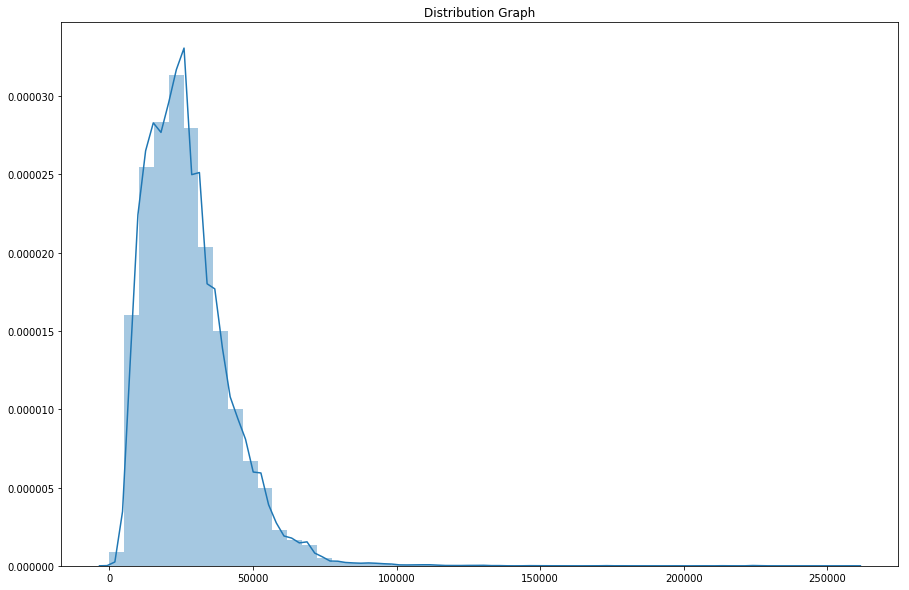

In [20]:
# Convert Non-Numerics
amt_annuity = np.nan_to_num(application_train['AMT_ANNUITY'], copy=True)
explore_numeric(amt_annuity)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 12.460817571807413 Min: 0.0 Mean: 10.067281762604763 Avg: 10.067281762604763 Std: 0.5494814442293304


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


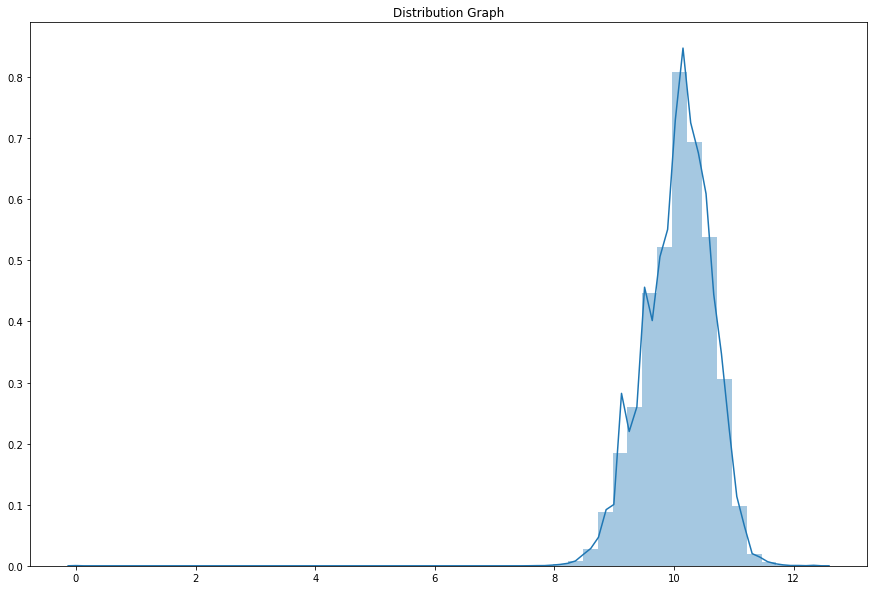

In [21]:
annuity = application_train['AMT_ANNUITY']
annuity_transformed = annuity.apply(lambda x: np.log(x + 1))
annuity_transformed_numeric = np.nan_to_num(annuity_transformed, copy=True)

#visualize the new distribution
explore_numeric(annuity_transformed_numeric)

# Swap the normalized data with the original field
application_train['AMT_ANNUITY_TRANSFORMED'] = annuity_transformed_numeric
result = application_train.drop('AMT_ANNUITY',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('AMT_ANNUITY_TRANSFORMED')

#### AMT_GOODS_PRICE
For consumer loans it is the price of the goods for which the loan is given

Max: 4050000.0 Min: 0.0 Mean: 537909.4796511345 Avg: 537909.4796511345 Std: 369633.15163863753


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


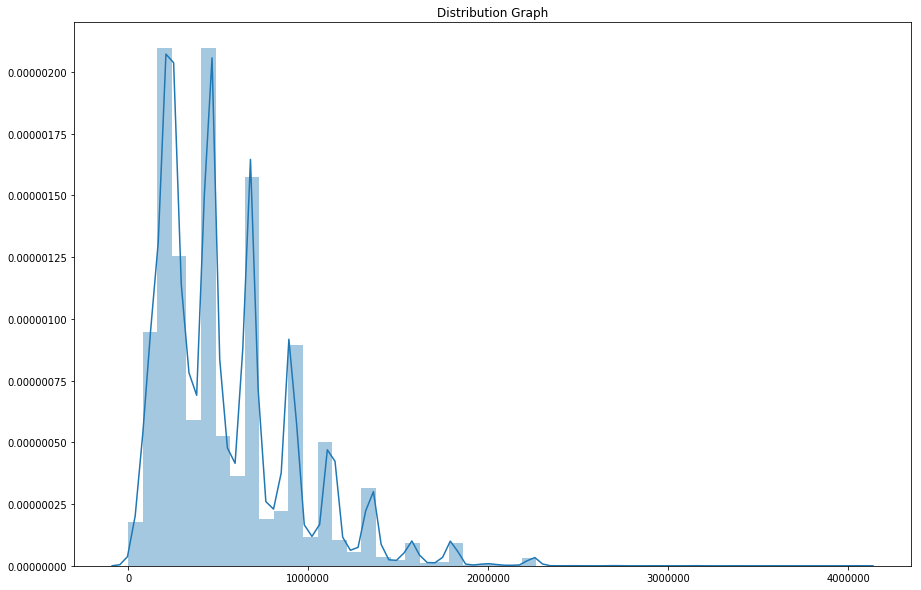

In [22]:
# Convert Non-Numerics
amt_goods_price = np.nan_to_num(application_train['AMT_GOODS_PRICE'], copy=True)
explore_numeric(amt_goods_price)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks normally distributed.

Max: 15.214227685996272 Min: 0.0 Mean: 12.948770745519909 Avg: 12.948770745519909 Std: 0.8143825559555455


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


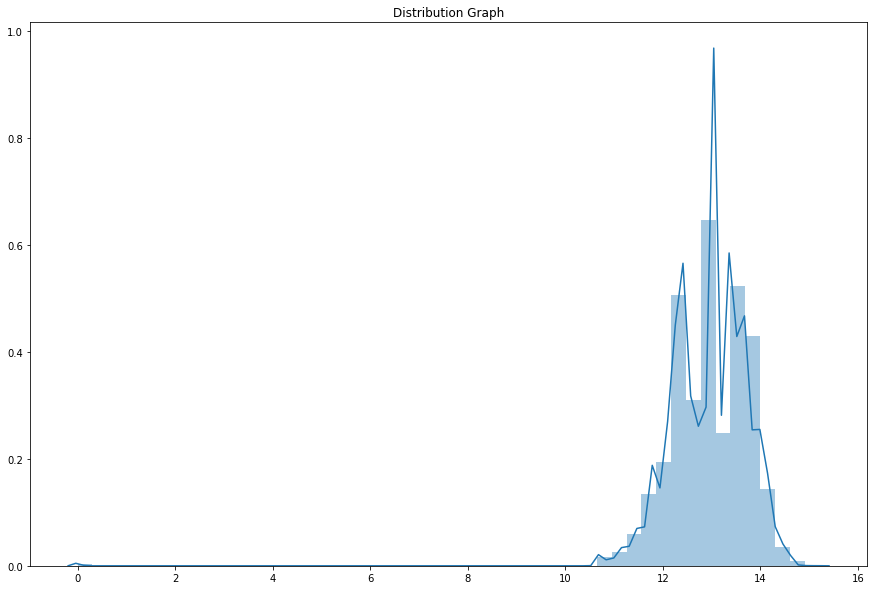

In [23]:
goods_price = application_train['AMT_GOODS_PRICE']
goods_price_transformed = goods_price.apply(lambda x: np.log(x + 1))
goods_price_transformed_numeric = np.nan_to_num(goods_price_transformed, copy=True)

#visualize the new distribution
explore_numeric(goods_price_transformed_numeric)

# Swap the normalized data with the original field
application_train['AMT_GOODS_PRICE_TRANSFORMED'] = goods_price_transformed_numeric
result = application_train.drop('AMT_GOODS_PRICE',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('AMT_GOODS_PRICE_TRANSFORMED')

#### NAME_TYPE_SUITE
Who was accompanying client when he was applying for the loan

Value: Children Count: 3267 Percentage: 1.0624010198009177
Value: Family Count: 40149 Percentage: 13.056118317718715
Value: Group of people Count: 271 Percentage: 0.08812692879279115
Value: Other_A Count: 866 Percentage: 0.2816159421939378
Value: Other_B Count: 1770 Percentage: 0.575589165916016
Value: Spouse, partner Count: 11370 Percentage: 3.697428709867289
Value: Unaccompanied Count: 248526 Percentage: 80.81857234375356
Value: missing Count: 1292 Percentage: 0.42014757195677555


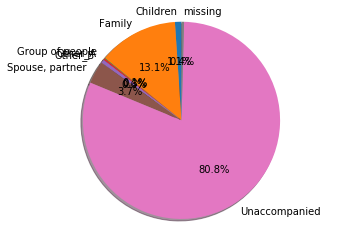

In [24]:
# Replace any nans with a string for easier encoding
# https://stackoverflow.com/questions/43066071/replace-numpy-nan-with-string-in-list-with-strings
name_type_suite = ['missing' if x is np.nan else x for x in application_train['NAME_TYPE_SUITE']]

explore_non_numeric(name_type_suite)

# Replace original data with modified data
application_train['NAME_TYPE_SUITE_NORMALIZED'] = name_type_suite
result = application_train.drop('NAME_TYPE_SUITE',axis=1)

# One-Hot Encode This Later
non_numeric_features.append('NAME_TYPE_SUITE_NORMALIZED')

#### NAME_INCOME_TYPE
Clients income type (businessman, working, maternity leave)

Value: Businessman Count: 10 Percentage: 0.0032519161916159094
Value: Commercial associate Count: 71617 Percentage: 23.28924818949566
Value: Maternity leave Count: 5 Percentage: 0.0016259580958079547
Value: Pensioner Count: 55362 Percentage: 18.003258420024
Value: State servant Count: 21703 Percentage: 7.057633710664009
Value: Student Count: 18 Percentage: 0.005853449144908637
Value: Unemployed Count: 22 Percentage: 0.007154215621555002
Value: Working Count: 158774 Percentage: 51.63197414076245


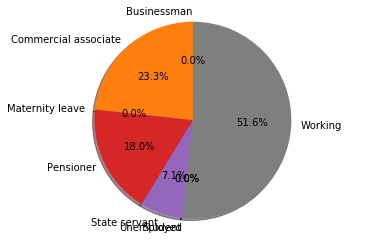

In [25]:
explore_non_numeric(application_train['NAME_INCOME_TYPE'])

# One-Hot Encode This Later
non_numeric_features.append("NAME_INCOME_TYPE")

#### NAME_EDUCATION_TYPE
Level of highest education the client achieved

Value: Academic degree Count: 164 Percentage: 0.053331425542500914
Value: Higher education Count: 74863 Percentage: 24.344820185294186
Value: Incomplete higher Count: 10277 Percentage: 3.3419942701236702
Value: Lower secondary Count: 3816 Percentage: 1.2409312187206312
Value: Secondary / secondary special Count: 218391 Percentage: 71.01892290031901


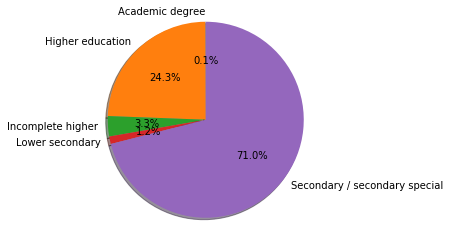

In [26]:
explore_non_numeric(application_train['NAME_EDUCATION_TYPE'])

# One-Hot Encode This Later
non_numeric_features.append("NAME_EDUCATION_TYPE")

#### NAME_FAMILY_STATUS
Family status of the client

Value: Civil marriage Count: 29775 Percentage: 9.68258046053637
Value: Married Count: 196432 Percentage: 63.87804013514964
Value: Separated Count: 19770 Percentage: 6.429038310824653
Value: Single / not married Count: 45444 Percentage: 14.77800794117934
Value: Unknown Count: 2 Percentage: 0.0006503832383231819
Value: Widow Count: 16088 Percentage: 5.231682769071676


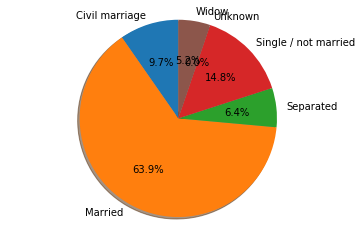

In [27]:
explore_non_numeric(application_train['NAME_FAMILY_STATUS'])

# One-Hot Encode This Later
non_numeric_features.append("NAME_FAMILY_STATUS")

#### NAME_HOUSING_TYPE
What is the housing situation of the client (renting, living with parents, ...)

Value: Co-op apartment Count: 1122 Percentage: 0.36486499669930506
Value: House / apartment Count: 272868 Percentage: 88.73438673738501
Value: Municipal apartment Count: 11183 Percentage: 3.636617877084072
Value: Office apartment Count: 2617 Percentage: 0.8510264673458836
Value: Rented apartment Count: 4881 Percentage: 1.5872602931277255
Value: With parents Count: 14840 Percentage: 4.82584362835801


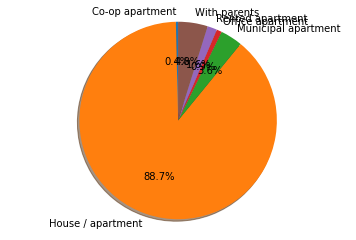

In [28]:
explore_non_numeric(application_train['NAME_HOUSING_TYPE'])

# One-Hot Encode This Later
non_numeric_features.append("NAME_HOUSING_TYPE")

#### REGION_POPULATION_RELATIVE
Normalized population of region where client lives (higher number means the client lives in more populated region)

Max: 0.072508 Min: 0.00029 Mean: 0.020868112057780042 Avg: 0.020868112057780042 Std: 0.013831257633604526


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


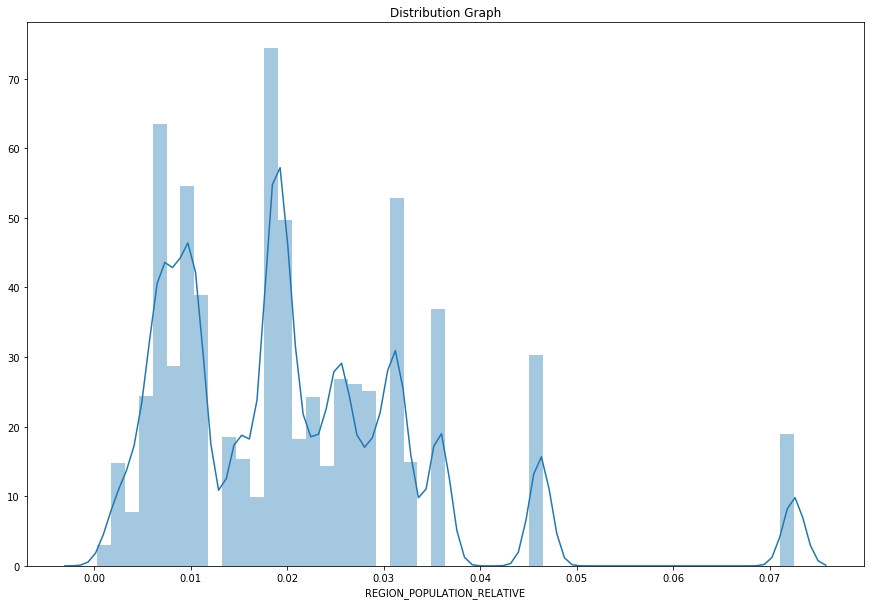

In [29]:
explore_numeric(application_train['REGION_POPULATION_RELATIVE'])

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('REGION_POPULATION_RELATIVE')

#### DAYS_BIRTH
Client's age in days, [subtracted from] at the time of application

Max: -7489 Min: -25229 Mean: -16036.995066843137 Avg: -16036.995066843137 Std: 4363.981536117146


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


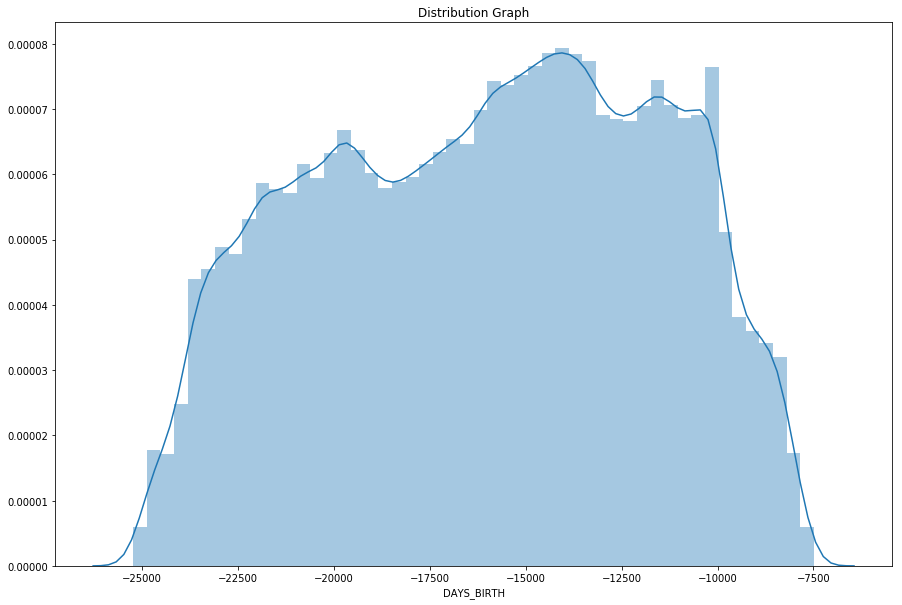

In [30]:
explore_numeric(application_train['DAYS_BIRTH'])

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('DAYS_BIRTH')

#### DAYS_EMPLOYED
How many days before the application the person started current employment

Max: 365243 Min: -17912 Mean: 63815.04590404896 Avg: 63815.04590404896 Std: 141275.53681006416


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


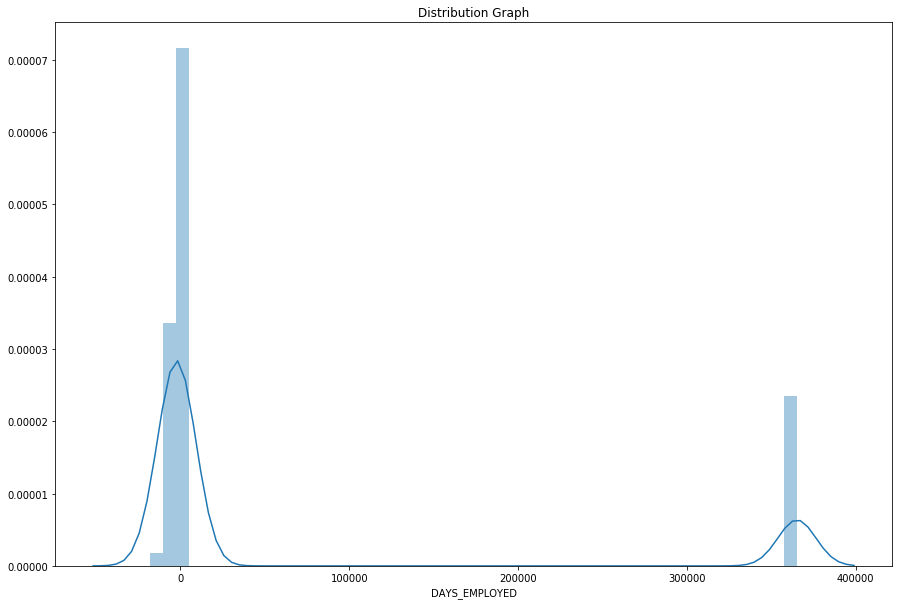

In [31]:
explore_numeric(application_train['DAYS_EMPLOYED'])

#### Preprocessing: 
There's a large body of outliers that indicate that someone has worked ~100 years.  This is clearly wrong.  Also, I don't expect this field to be normally distributed (I think you'd see a decreasing number of people employed in the same role over time and a body of people with no job or no work history), so doing a log transformation seems inappropriate.


Max: 0 Min: -17912 Mean: -1954.8481225061869 Avg: -1954.8481225061869 Std: 2307.065145271043


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


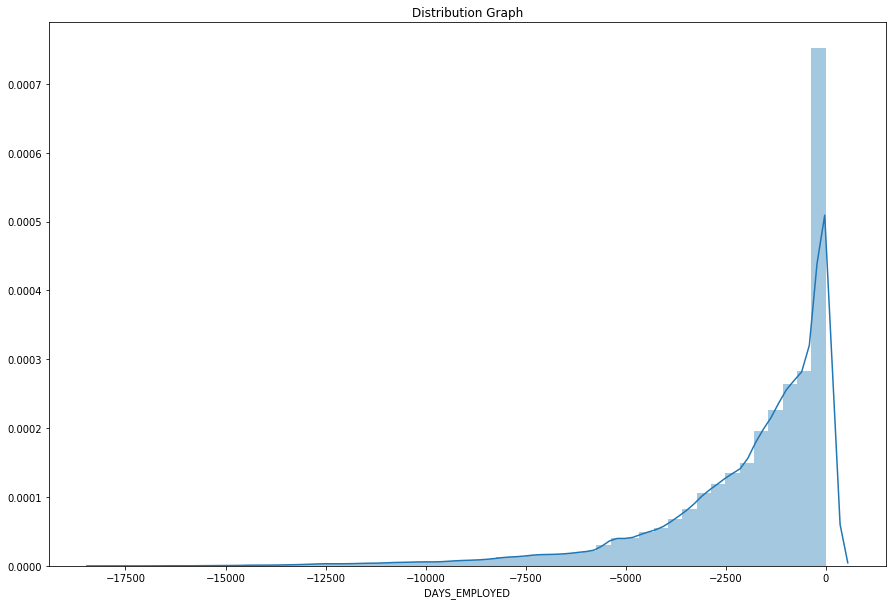

In [32]:
days_employed = application_train['DAYS_EMPLOYED']

# A bunch of records indicate that the person has worked for ~100 years.
# We'll need to replace those
days_employed = days_employed.replace({365243: 0})

#visualize the new distribution
explore_numeric(days_employed)

# Swap the normalized data with the original field
application_train['DAYS_EMPLOYED_TRANSFORMED'] = days_employed
result = application_train.drop('DAYS_EMPLOYED',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('DAYS_EMPLOYED_TRANSFORMED')

#### DAYS_REGISTRATION
How many days before the application did client change his registration

Max: 0.0 Min: -24672.0 Mean: -4986.120327538419 Avg: -4986.120327538419 Std: 3522.8805928928805


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


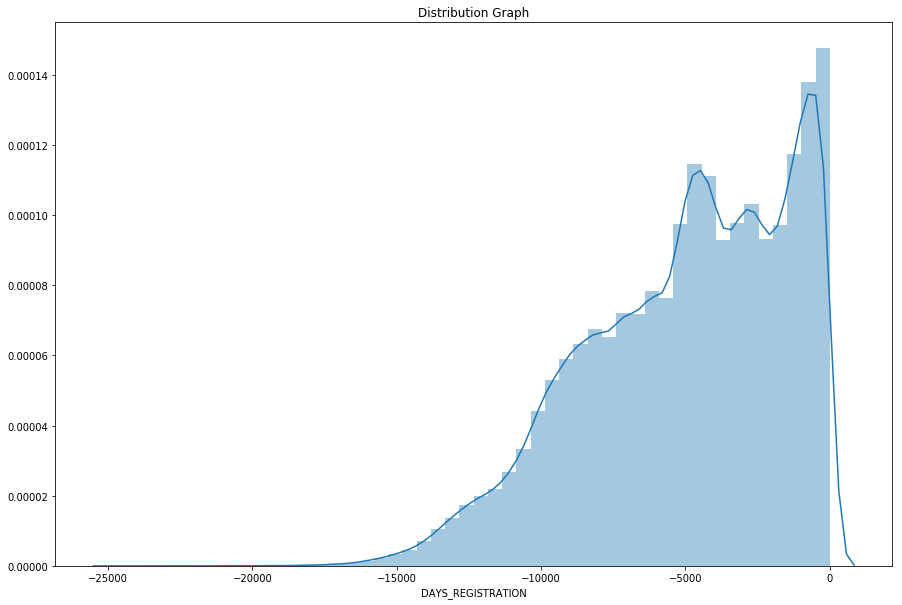

In [33]:
explore_numeric(application_train['DAYS_REGISTRATION'])
numeric_features.append('DAYS_REGISTRATION')

#### DAYS_ID_PUBLISH
How many days before the application did client change the identity document with which he applied for the loan

In [34]:
days_id_publish = application_train['DAYS_ID_PUBLISH']
numeric_features.append(['DAYS_ID_PUBLISH'])

#### OWN_CAR_AGE
Age of client's car

Max: 0    91.0
dtype: float64 Min: 0    0.0
dtype: float64 Mean: 0    4.101879
dtype: float64 Avg: 4.101879282367134 Std: 0    9.009499
dtype: float64


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


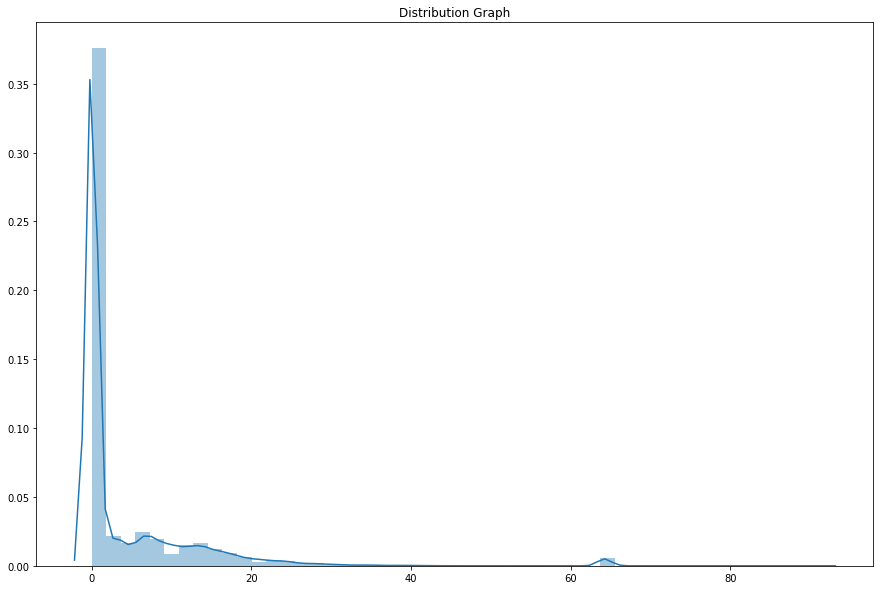

In [35]:
own_car_age = application_train['OWN_CAR_AGE']
own_car_age_numeric = np.nan_to_num(application_train['OWN_CAR_AGE'])
own_car_age_numeric = pd.DataFrame(data=own_car_age_numeric)
explore_numeric(own_car_age_numeric)

#### Preprocessing: 
This feature is skewed right, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks more normally distributed, and I think the high representation of people with new or no cars is more reasonable.

Max: 0    4.521789
dtype: float64 Min: 0    0.0
dtype: float64 Mean: 0    0.763979
dtype: float64 Avg: 0.7639788625473312 Std: 0    1.168945
dtype: float64


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


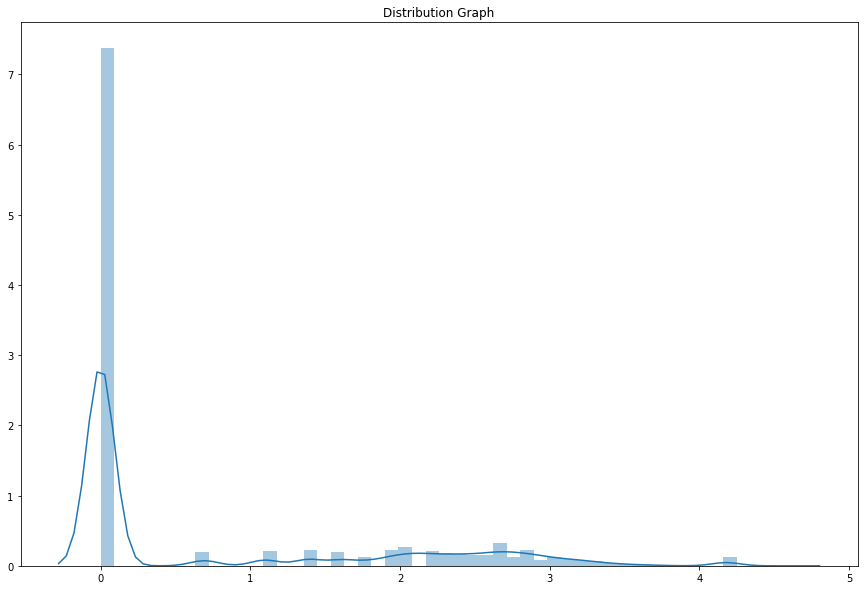

In [36]:
own_car_age_numeric_transformed = own_car_age_numeric.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(own_car_age_numeric_transformed)

# Swap the normalized data with the original field
application_train['OWN_CAR_AGE_TRANSFORMED'] = own_car_age_numeric_transformed
result = application_train.drop('OWN_CAR_AGE_TRANSFORMED',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('OWN_CAR_AGE_TRANSFORMED')

#### FLAG_MOBIL
Did client provide mobile phone (1=YES, 0=NO)

Value: 0 Count: 1 Percentage: 0.00032519161916159093
Value: 1 Count: 307510 Percentage: 99.99967480838083


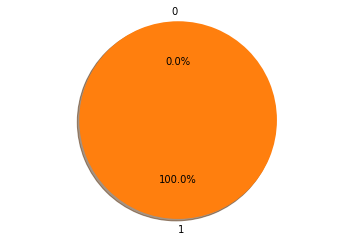

In [37]:
explore_non_numeric(application_train['FLAG_MOBIL'])

In [38]:
# Given the fact that 99.999% of people have a cellphone, we can drop this feature
result = application_train.drop('FLAG_MOBIL',axis=1)

#### FLAG_EMP_PHONE

Did client provide work phone (1=YES, 0=NO)

Value: 0 Count: 55386 Percentage: 18.011063018883878
Value: 1 Count: 252125 Percentage: 81.98893698111613


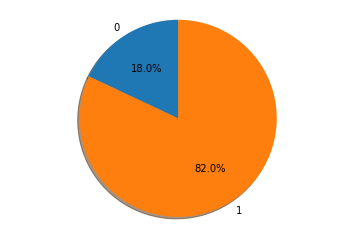

In [39]:
explore_non_numeric(application_train['FLAG_EMP_PHONE'])

### Preprocessing 
This is a Y/N string field.  We'll re-encode it as a bool for easier analysis later

Value: 0 Count: 55386 Percentage: 18.011063018883878
Value: 1 Count: 252125 Percentage: 81.98893698111613


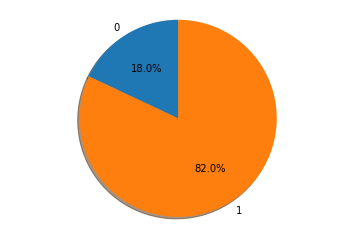

In [40]:
lb = LabelBinarizer()
bool_emp_phone = lb.fit_transform(application_train['FLAG_EMP_PHONE'])

explore_non_numeric(bool_emp_phone)

# Swap the modified data with the original field
application_train['BOOL_EMP_PHONE'] = bool_emp_phone
result = application_train.drop('BOOL_EMP_PHONE',axis=1)

#### FLAG_WORK_PHONE
Did client provide home phone (1=YES, 0=NO)

Value: 0 Count: 246203 Percentage: 80.06315221244118
Value: 1 Count: 61308 Percentage: 19.93684778755882


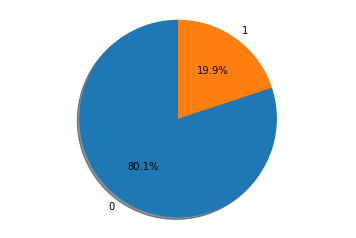

In [41]:
explore_non_numeric(application_train['FLAG_WORK_PHONE'])

### Preprocessing 
This is a Y/N string field.  We'll re-encode it as a bool for easier analysis later

Value: 0 Count: 246203 Percentage: 80.06315221244118
Value: 1 Count: 61308 Percentage: 19.93684778755882


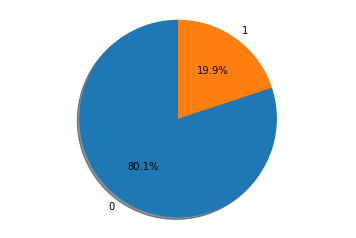

In [42]:
lb = LabelBinarizer()
bool_work_phone = lb.fit_transform(application_train['FLAG_WORK_PHONE'])

explore_non_numeric(bool_work_phone)

# Swap the modified data with the original field
application_train['BOOL_WORK_PHONE'] = bool_emp_phone
result = application_train.drop('BOOL_WORK_PHONE',axis=1)

#### FLAG_PHONE
Did client provide home phone (1=YES, 0=NO)

Value: 0 Count: 221080 Percentage: 71.89336316424453
Value: 1 Count: 86431 Percentage: 28.106636835755467


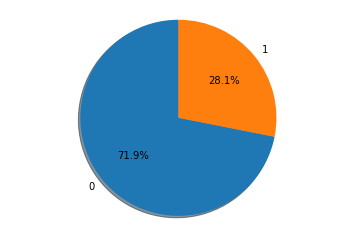

In [43]:
explore_non_numeric(application_train['FLAG_PHONE'])

### Preprocessing 
This is a Y/N string field.  We'll re-encode it as a bool for easier analysis later

Value: 0 Count: 221080 Percentage: 71.89336316424453
Value: 1 Count: 86431 Percentage: 28.106636835755467


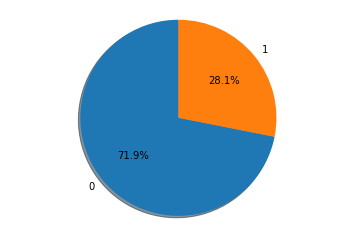

In [44]:
lb = LabelBinarizer()
bool_phone = lb.fit_transform(application_train['FLAG_PHONE'])

explore_non_numeric(bool_phone)

# Swap the modified data with the original field
application_train['BOOL_PHONE'] = bool_emp_phone
result = application_train.drop('BOOL_PHONE',axis=1)

#### FLAG_EMAIL
Did client provide email (1=YES, 0=NO)

Value: 0 Count: 290069 Percentage: 94.32800777858354
Value: 1 Count: 17442 Percentage: 5.6719922214164695


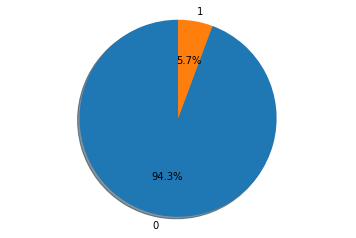

In [45]:
explore_non_numeric(application_train['FLAG_EMAIL'])

### Preprocessing 
This is a Y/N string field.  We'll re-encode it as a bool for easier analysis later

Value: 0 Count: 290069 Percentage: 94.32800777858354
Value: 1 Count: 17442 Percentage: 5.6719922214164695


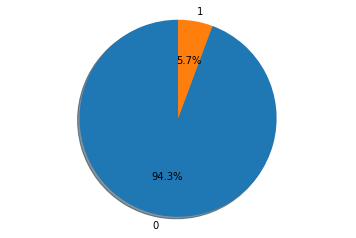

In [46]:
lb = LabelBinarizer()
bool_email = lb.fit_transform(application_train['FLAG_EMAIL'])

explore_non_numeric(bool_email)

# Swap the modified data with the original field
application_train['BOOL_EMAIL'] = bool_email
result = application_train.drop('BOOL_EMAIL',axis=1)

#### OCCUPATION_TYPE
Family status of the client

Value: Accountants Count: 9813 Percentage: 3.1911053588326923
Value: Cleaning staff Count: 4653 Percentage: 1.5131166039588828
Value: Cooking staff Count: 5946 Percentage: 1.9335893675348197
Value: Core staff Count: 27570 Percentage: 8.965532940285064
Value: Drivers Count: 18603 Percentage: 6.049539691263077
Value: HR staff Count: 563 Percentage: 0.1830828815879757
Value: High skill tech staff Count: 11380 Percentage: 3.7006806260589054
Value: IT staff Count: 526 Percentage: 0.17105079167899687
Value: Laborers Count: 55186 Percentage: 17.94602469505156
Value: Low-skill Laborers Count: 2093 Percentage: 0.6806260589052099
Value: Managers Count: 21371 Percentage: 6.94967009310236
Value: Medicine staff Count: 8537 Percentage: 2.776160852782502
Value: Missing Count: 96391 Percentage: 31.345545362604916
Value: Private service staff Count: 2652 Percentage: 0.8624081740165392
Value: Realty agents Count: 751 Percentage: 0.24421890599035484
Value: Sales staff Count: 32102 Percentage: 10.43930135

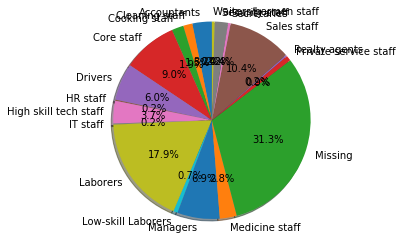

In [50]:
occupation_type = application_train['OCCUPATION_TYPE']
occupation_type = occupation_type.replace(np.nan, "Missing")

explore_non_numeric(occupation_type)


# Swap the normalized data with the original field
application_train['OCCUPATION_TYPE_NORMALIZED'] = occupation_type
result = application_train.drop('OCCUPATION_TYPE',axis=1)

#### CNT_FAM_MEMBERS
How many family members does client have

Max: 20.0 Min: 0.0 Mean: 2.152651449866834 Avg: 2.152651449866834 Std: 0.910693674052923


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


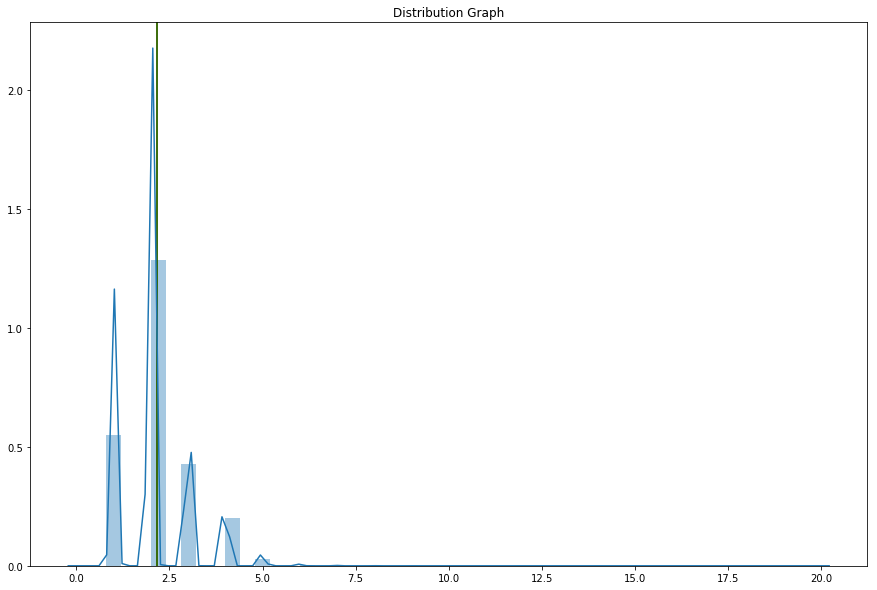

In [68]:
cnt_fam_members_numeric = np.nan_to_num(application_train['CNT_FAM_MEMBERS'])
explore_numeric(cnt_fam_members_numeric)

#### REGION_RATING_CLIENT
Our rating of the region where client lives (1,2,3)

Max: 3 Min: 1 Mean: 2.0524631639193394 Avg: 2.0524631639193394 Std: 0.5090330751472117


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


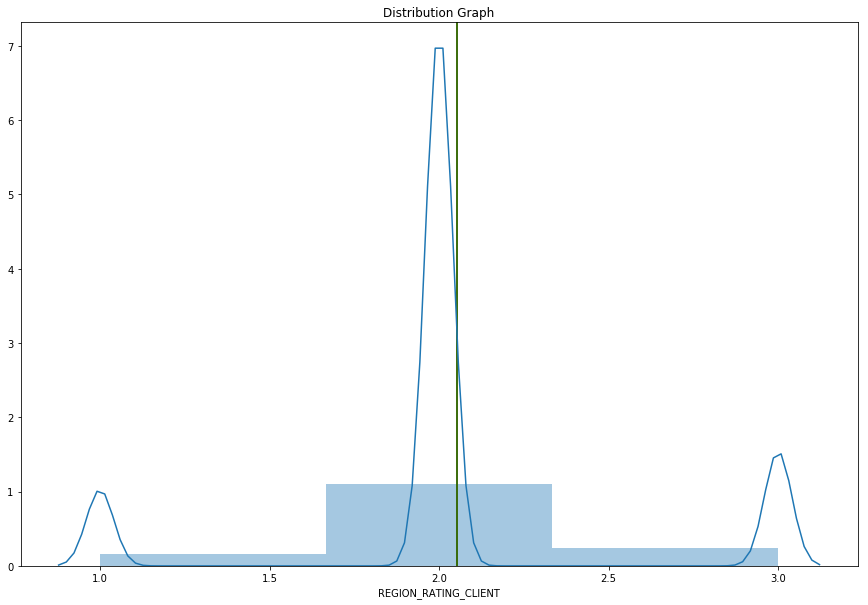

In [67]:
explore_numeric(application_train['REGION_RATING_CLIENT'], graphType="hist", bins=3)

#### REGION_RATING_CLIENT_W_CITY
Our rating of the region where client lives with taking city into account (1,2,3)

Max: 3 Min: 1 Mean: 2.031520823645333 Avg: 2.031520823645333 Std: 0.5027362154847554


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


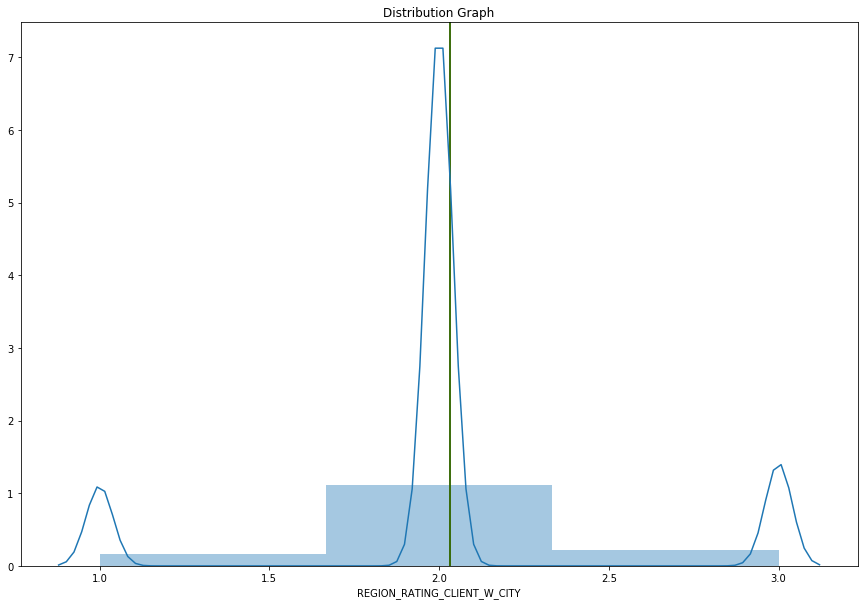

In [69]:
explore_numeric(application_train['REGION_RATING_CLIENT_W_CITY'],graphType="hist",bins=3)

#### WEEKDAY_APPR_PROCESS_START
On which day of the week did the client apply for the loan

Value: FRIDAY Count: 50338 Percentage: 16.369495725356167
Value: MONDAY Count: 50714 Percentage: 16.491767774160923
Value: SATURDAY Count: 33852 Percentage: 11.008386691858178
Value: SUNDAY Count: 16181 Percentage: 5.261925589653703
Value: THURSDAY Count: 50591 Percentage: 16.451769205004048
Value: TUESDAY Count: 53901 Percentage: 17.528153464428915
Value: WEDNESDAY Count: 51934 Percentage: 16.888501549538066


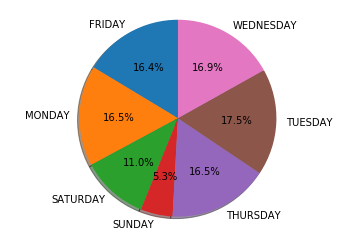

In [72]:
explore_non_numeric(application_train['WEEKDAY_APPR_PROCESS_START'])
non_numeric_features.append("WEEKDAY_APPR_PROCESS_START")

#### HOUR_APPR_PROCESS_START
Approximately at what hour did the client apply for the loan

Max: 23 Min: 0 Mean: 12.063418869568894 Avg: 12.063418869568894 Std: 3.265826945327158


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


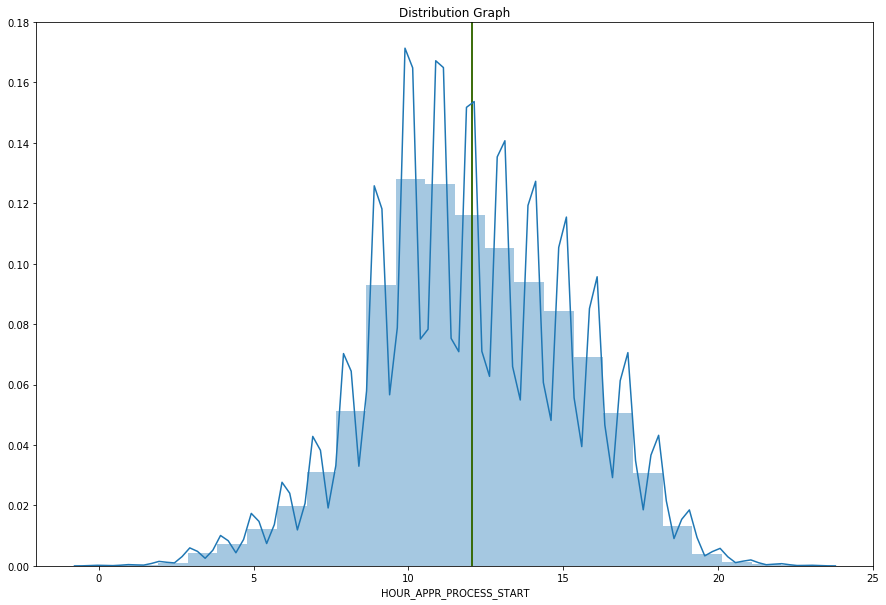

In [75]:
explore_numeric(application_train['HOUR_APPR_PROCESS_START'],graphType="hist",bins=24)

#### REG_REGION_NOT_LIVE_REGION
Flag if client's permanent address does not match contact address (1=different, 0=same, at region level)

Value: 0 Count: 302854 Percentage: 98.48558262956448
Value: 1 Count: 4657 Percentage: 1.514417370435529


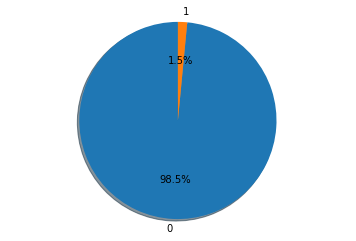

In [76]:
explore_non_numeric(application_train['REG_REGION_NOT_LIVE_REGION'])

#### REG_REGION_NOT_WORK_REGION
Flag if client's permanent address does not match work address (1=different, 0=same, at region level)

Value: 0 Count: 291899 Percentage: 94.92310844164923
Value: 1 Count: 15612 Percentage: 5.076891558350758


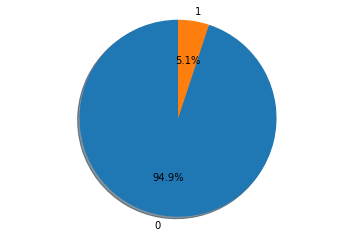

In [77]:
explore_non_numeric(application_train['REG_REGION_NOT_WORK_REGION'])

#### LIVE_REGION_NOT_WORK_REGION
Flag if client's contact address does not match work address (1=different, 0=same, at region level)

Value: 0 Count: 295008 Percentage: 95.93412918562262
Value: 1 Count: 12503 Percentage: 4.065870814377372


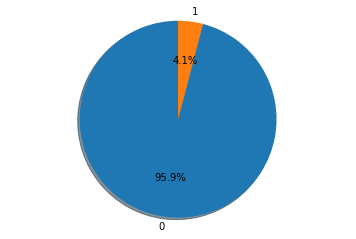

In [78]:
explore_non_numeric(application_train['LIVE_REGION_NOT_WORK_REGION'])

#### REG_CITY_NOT_LIVE_CITY
Flag if client's permanent address does not match contact address (1=different, 0=same, at city level)

Value: 0 Count: 283472 Percentage: 92.18271866697452
Value: 1 Count: 24039 Percentage: 7.817281333025486


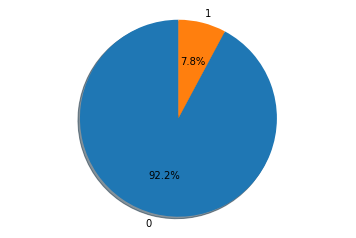

In [79]:
explore_non_numeric(application_train['REG_CITY_NOT_LIVE_CITY'])

#### REG_CITY_NOT_WORK_CITY
Flag if client's permanent address does not match work address (1=different, 0=same, at city level)

Value: 0 Count: 236644 Percentage: 76.95464552487553
Value: 1 Count: 70867 Percentage: 23.045354475124466


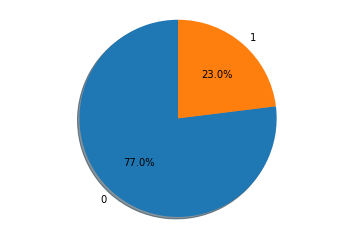

In [80]:
explore_non_numeric(application_train['REG_CITY_NOT_WORK_CITY'])

#### LIVE_CITY_NOT_WORK_CITY
Flag if client's contact address does not match work address (1=different, 0=same, at city level)

Value: 0 Count: 252296 Percentage: 82.04454474799276
Value: 1 Count: 55215 Percentage: 17.955455252007248


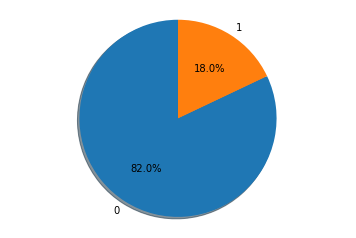

In [81]:
explore_non_numeric(application_train['LIVE_CITY_NOT_WORK_CITY'])

#### ORGANIZATION_TYPE
Type of organization where client works

Value: Advertising Count: 429 Percentage: 0.13950720462032254
Value: Agriculture Count: 2454 Percentage: 0.7980202334225442
Value: Bank Count: 2507 Percentage: 0.8152553892381086
Value: Business Entity Type 1 Count: 5984 Percentage: 1.9459466490629604
Value: Business Entity Type 2 Count: 10553 Percentage: 3.4317471570122695
Value: Business Entity Type 3 Count: 67992 Percentage: 22.110428570034895
Value: Cleaning Count: 260 Percentage: 0.08454982098201365
Value: Construction Count: 6721 Percentage: 2.185612872385053
Value: Culture Count: 379 Percentage: 0.12324762366224297
Value: Electricity Count: 950 Percentage: 0.3089320382035114
Value: Emergency Count: 560 Percentage: 0.18210730673049094
Value: Government Count: 10404 Percentage: 3.383293605757193
Value: Hotel Count: 966 Percentage: 0.3141351041100969
Value: Housing Count: 2958 Percentage: 0.9619168094799861
Value: Industry: type 1 Count: 1039 Percentage: 0.33787409230889304
Value: Industry: type 10 Count: 109 Percentage: 0.03544588

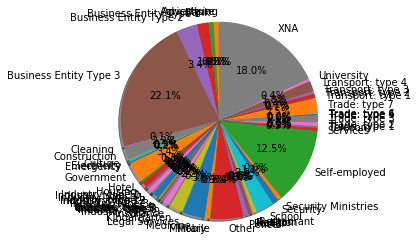

In [82]:
explore_non_numeric(application_train['ORGANIZATION_TYPE'])

#### EXT_SOURCE_1
Normalized score from external data source

Max: 0.962692770561306 Min: 0.0 Mean: 0.21902363564927793 Avg: 0.21902363564927793 Std: 0.2853731600691115


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


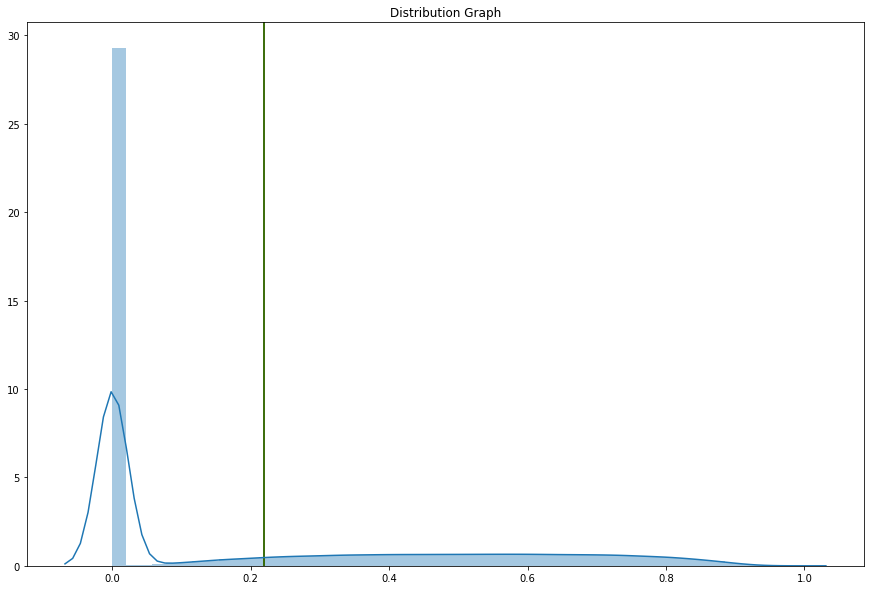

In [85]:
ext_source_1 = np.nan_to_num(application_train['EXT_SOURCE_1'])
explore_numeric(ext_source_1)

#### EXT_SOURCE_2
Normalized score from external data source

Max: 0.962692770561306 Min: 0.0 Mean: 0.21902363564927793 Avg: 0.21902363564927793 Std: 0.2853731600691115


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


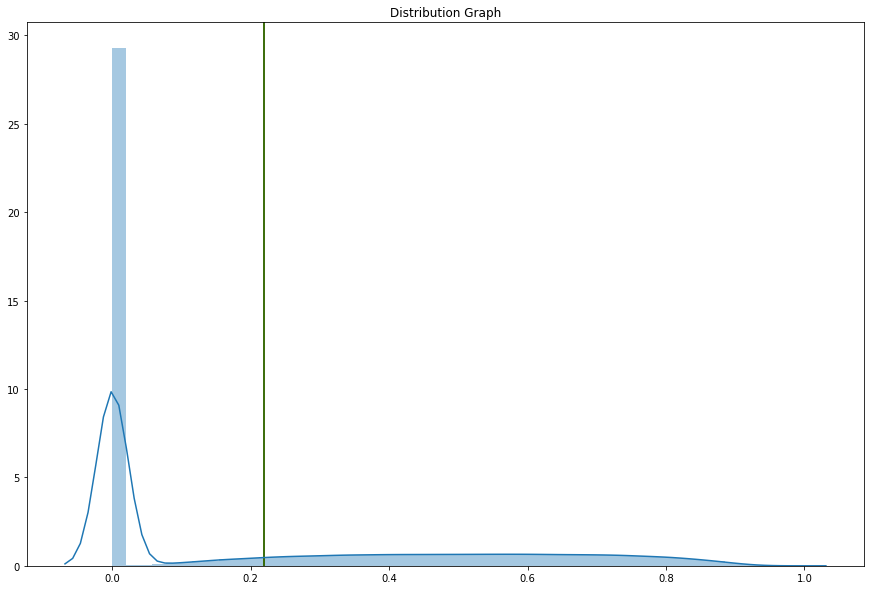

In [87]:
ext_source_2 = np.nan_to_num(application_train['EXT_SOURCE_2'])
explore_numeric(ext_source_1)

#### EXT_SOURCE_3
Normalized score from external data source

Max: 0.8960095494948396 Min: 0.0 Mean: 0.4095747488936846 Avg: 0.4095747488936846 Std: 0.26817649872762345


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


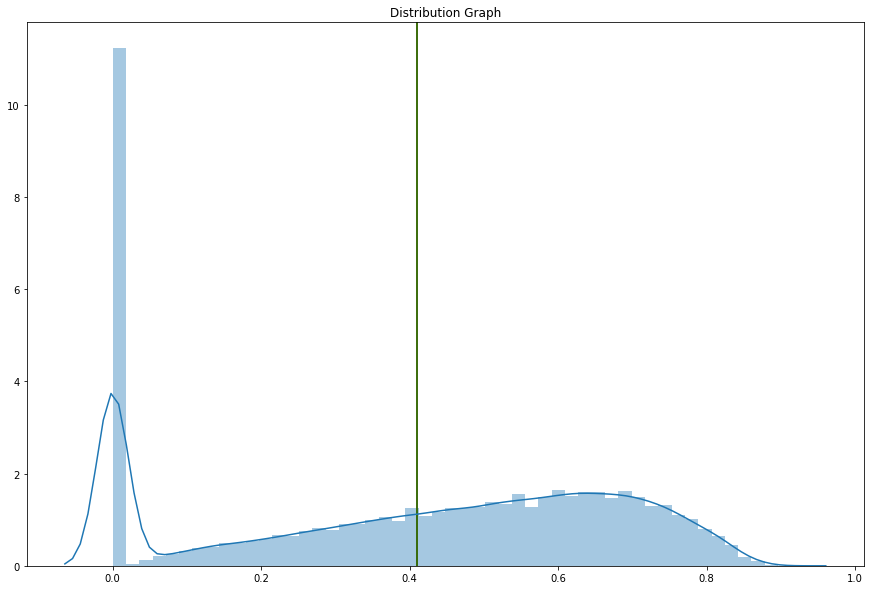

In [89]:
ext_source_3 = np.nan_to_num(application_train['EXT_SOURCE_3'])
explore_numeric(ext_source_3)

#### APARTMENTS_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.05783976378080783 Avg: 0.05783976378080783 Std: 0.09600727420429658


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


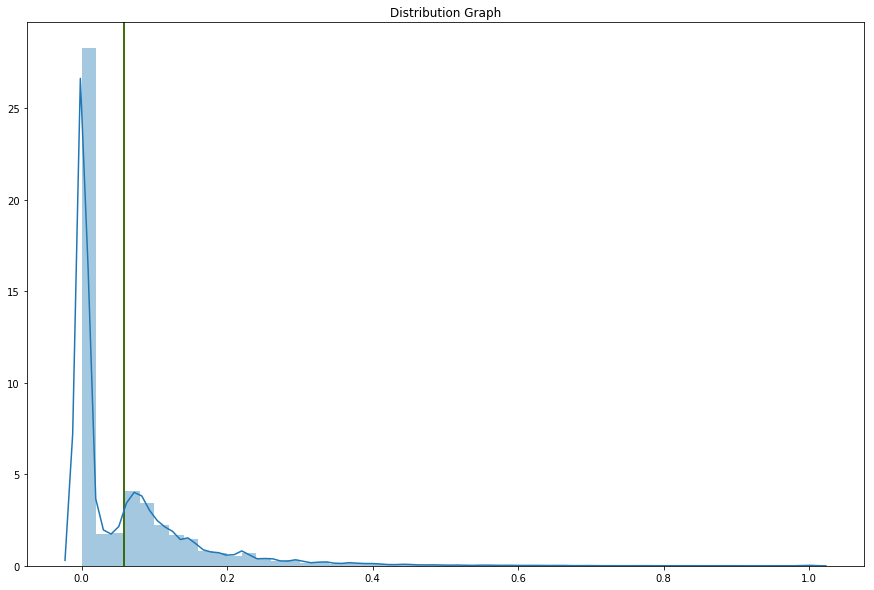

In [91]:
apartments_avg = np.nan_to_num(application_train['APARTMENTS_AVG'])
explore_numeric(apartments_avg)

#### BASEMENTAREA_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.03668940948453876 Avg: 0.03668940948453876 Std: 0.06868794896450368


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


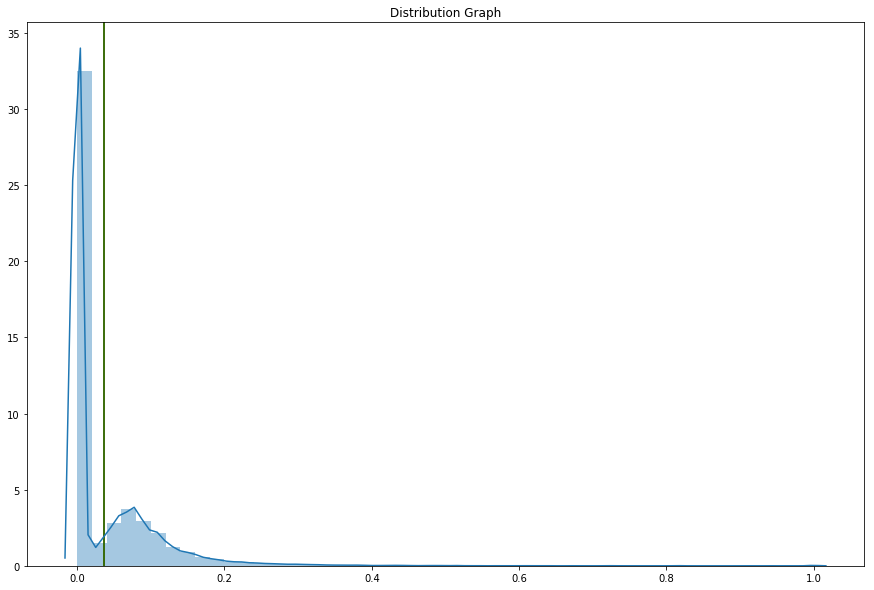

In [92]:
basementarea_avg = np.nan_to_num(application_train['BASEMENTAREA_AVG'])
explore_numeric(basementarea_avg)

#### YEARS_BEGINEXPLUATATION_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.5007858291248118 Avg: 0.5007858291248118 Std: 0.49055658040294225


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


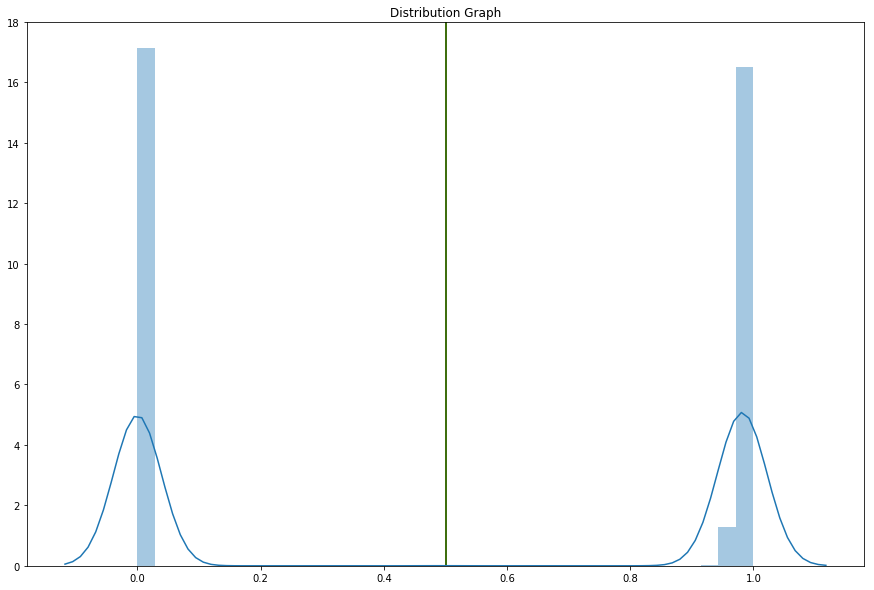

In [94]:
years_beginexpluatation_avg = np.nan_to_num(application_train['YEARS_BEGINEXPLUATATION_AVG'])
explore_numeric(years_beginexpluatation_avg)

#### YEARS_BUILD_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.25209460604661293 Avg: 0.25209460604661293 Std: 0.3611666874405317


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


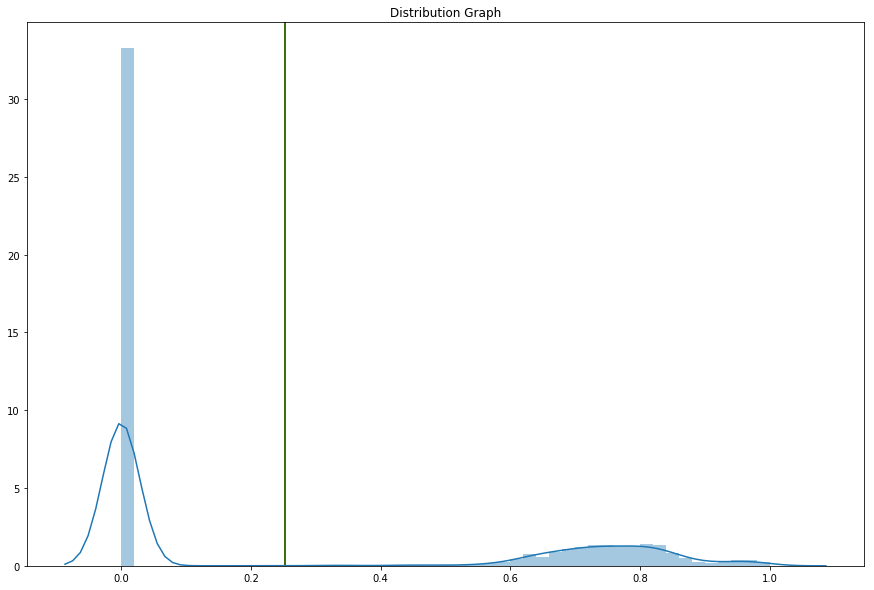

In [95]:
years_build_avg = np.nan_to_num(application_train['YEARS_BUILD_AVG'])
explore_numeric(years_build_avg)

#### COMMONAREA_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.013443196503539711 Avg: 0.013443196503539711 Std: 0.04648569802479897


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


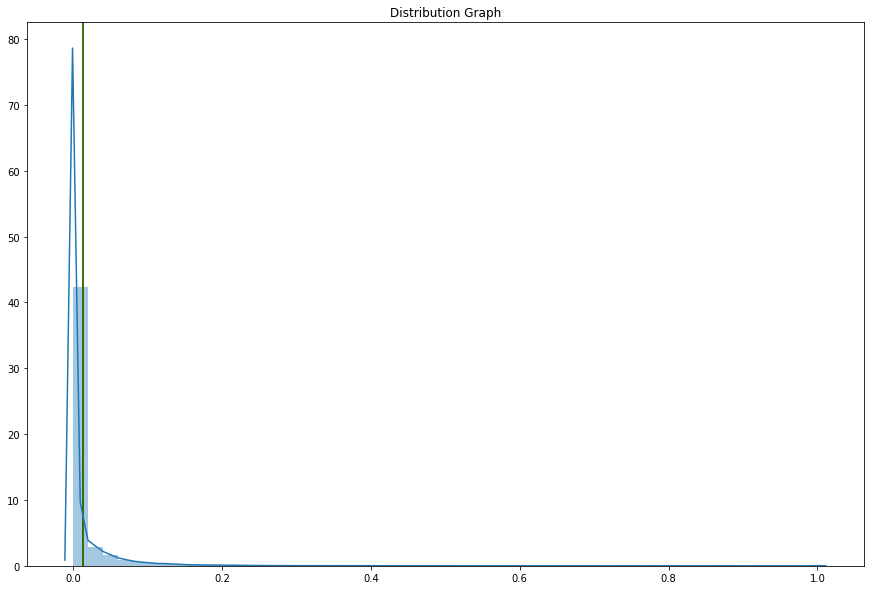

In [96]:
commonarea_avg = np.nan_to_num(application_train['COMMONAREA_AVG'])
explore_numeric(commonarea_avg)

#### ELEVATORS_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.03686885997574071 Avg: 0.03686885997574071 Std: 0.10004767303592957


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


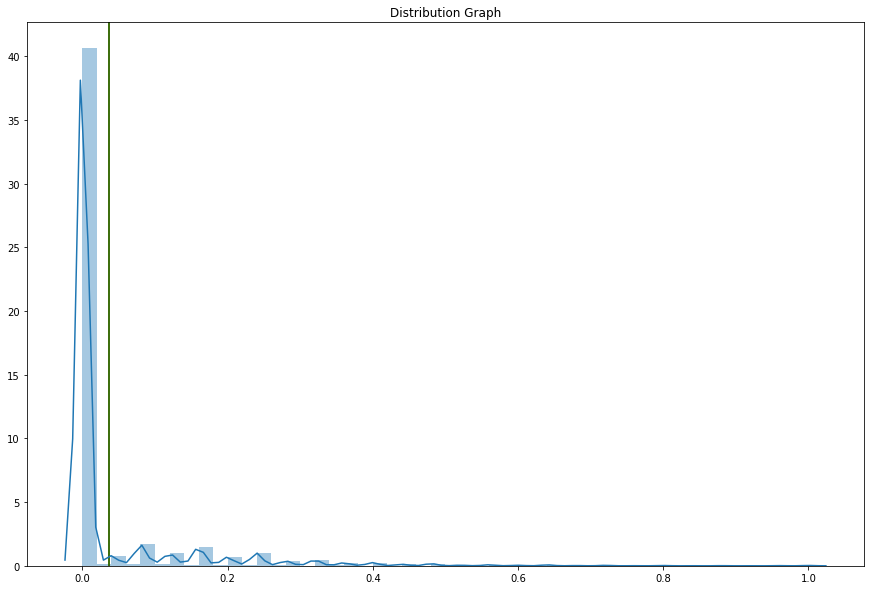

In [97]:
elevators_avg = np.nan_to_num(application_train['ELEVATORS_AVG'])
explore_numeric(elevators_avg)

#### ENTRANCES_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.07434014327942741 Avg: 0.07434014327942741 Std: 0.10283027852141224


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


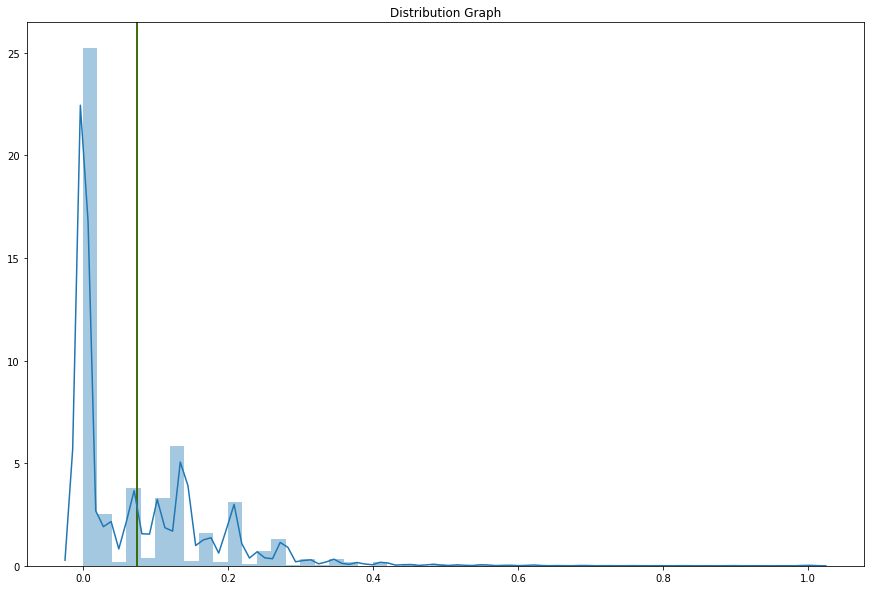

In [98]:
entrances_avg = np.nan_to_num(application_train['ENTRANCES_AVG'])
explore_numeric(entrances_avg)

#### FLOORSMAX_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.11368217104428785 Avg: 0.11368217104428785 Std: 0.15267946408809066


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


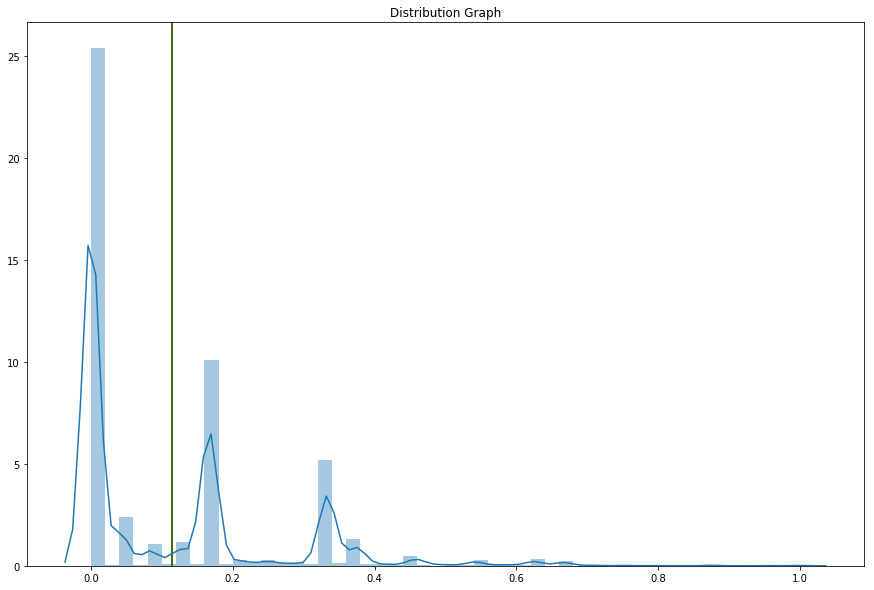

In [99]:
floorsmax_avg = np.nan_to_num(application_train['FLOORSMAX_AVG'])
explore_numeric(floorsmax_avg)

#### FLOORSMIN_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.07455693780059901 Avg: 0.07455693780059901 Std: 0.1417879441536891


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


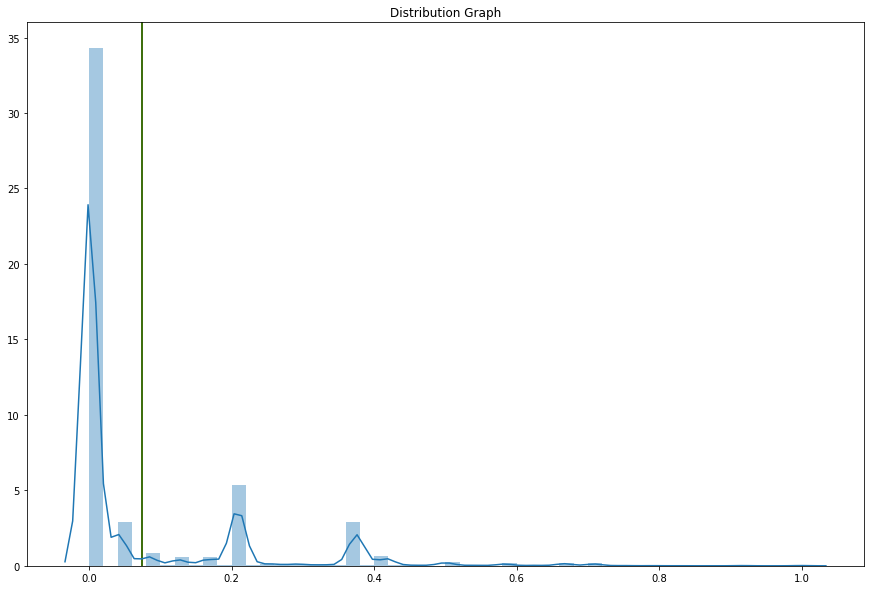

In [100]:
floorsmin_avg = np.nan_to_num(application_train['FLOORSMIN_AVG'])
explore_numeric(floorsmin_avg)

#### LANDAREA_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.02694670336996075 Avg: 0.02694670336996075 Std: 0.0611449560917169


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


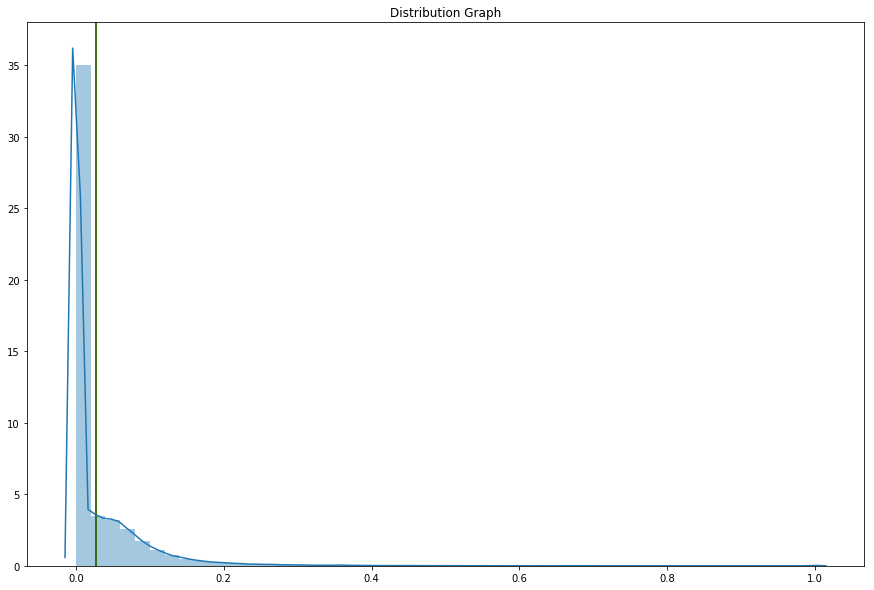

In [102]:
landarea_avg = np.nan_to_num(application_train['LANDAREA_AVG'])
explore_numeric(landarea_avg)

#### LIVINGAPARTMENTS_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.031890224739928 Avg: 0.031890224739928 Std: 0.07006285897838664


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


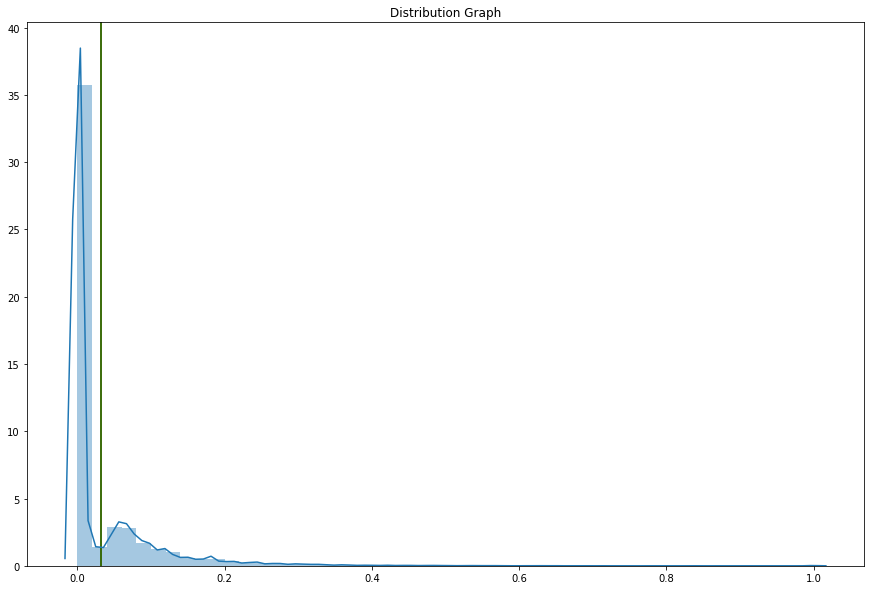

In [103]:
livingapartments_avg = np.nan_to_num(application_train['LIVINGAPARTMENTS_AVG'])
explore_numeric(livingapartments_avg)

#### LIVINGAREA_AVG
Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor

Max: 1.0 Min: 0.0 Mean: 0.05349187898969467 Avg: 0.05349187898969467 Std: 0.09472158230127702


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


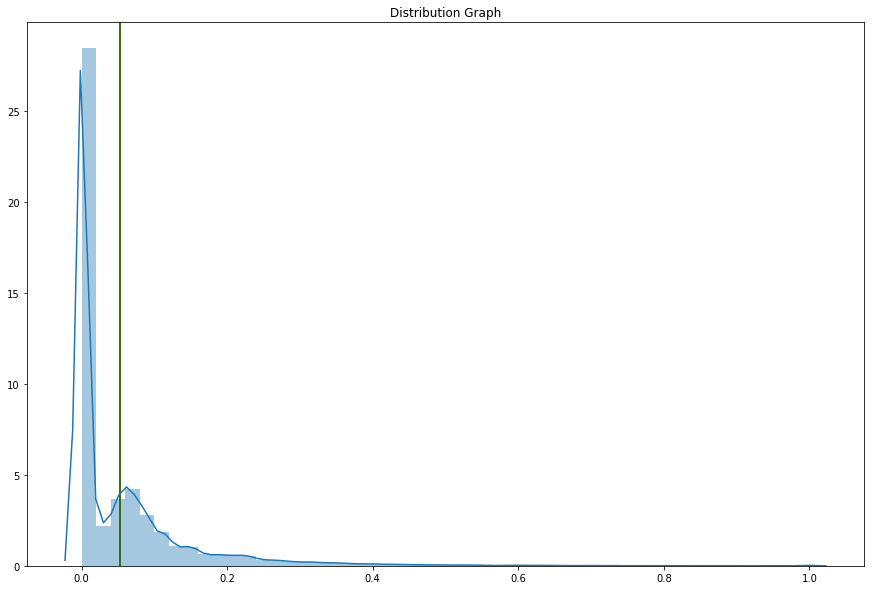

In [104]:
livingarea_avg = np.nan_to_num(application_train['LIVINGAREA_AVG'])
explore_numeric(livingarea_avg)

### Note: It looks like these cells are well-normalized and usable as-is.  Skipping the remainder of the normalized housing stats.

#### OBS_30_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 30 DPD (days past due) default

Max: 348.0 Min: 0.0 Mean: 1.4175232755901415 Avg: 1.4175232755901415 Std: 2.398391506366694


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


array([2., 1., 0., ..., 6., 0., 0.])

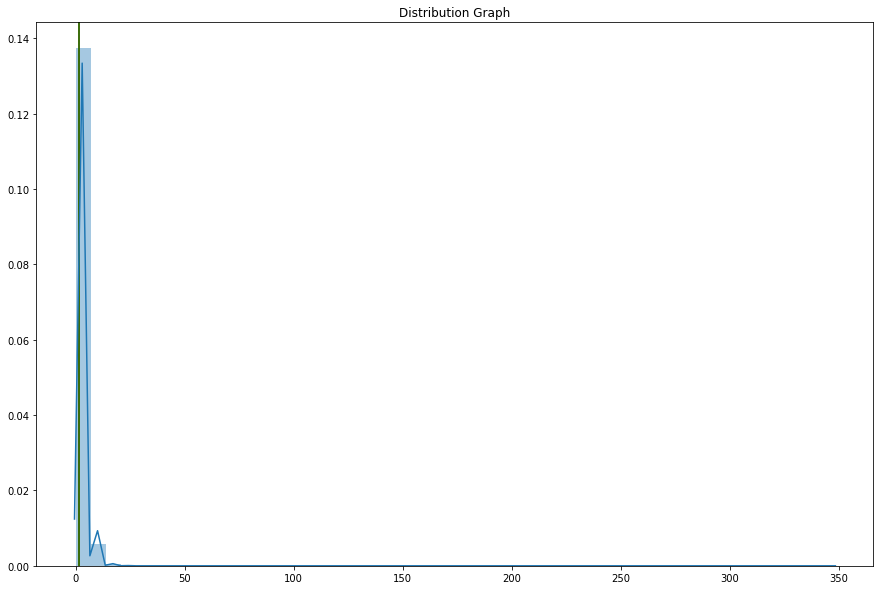

In [109]:
obs_30 = np.nan_to_num(application_train['OBS_30_CNT_SOCIAL_CIRCLE'])
explore_numeric(obs_30)

#### Preprocessing: 
This feature is highly skewed, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks much more like a normal distribution, with mean and average values near the peak.

Max: 18.57768450130904 Min: 10.152337836193743 Mean: 11.909245341906919 Avg: 11.909245341906919 Std: 0.4889056656307125


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


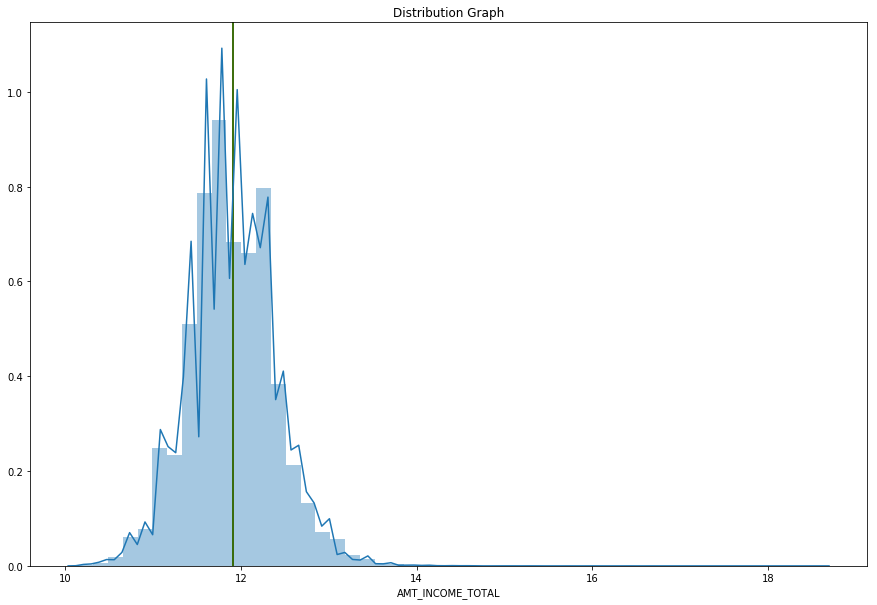

In [111]:
obs_30 = application_train['OBS_30_CNT_SOCIAL_CIRCLE']
obs_30_transformed = income_total.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(obs_30_transformed)

# Swap the normalized data with the original field
application_train['OBS_30_CNT_SOCIAL_CIRCLE_TRANSFORMED'] = income_total_transformed
result = application_train.drop('OBS_30_CNT_SOCIAL_CIRCLE',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('OBS_30_CNT_SOCIAL_CIRCLE_TRANSFORMED')

#### DEF_30_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings defaulted on 30 DPD (days past due)

Max: 34.0 Min: 0.0 Mean: 0.14294448003486054 Avg: 0.14294448003486054 Std: 0.4460318305123124


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


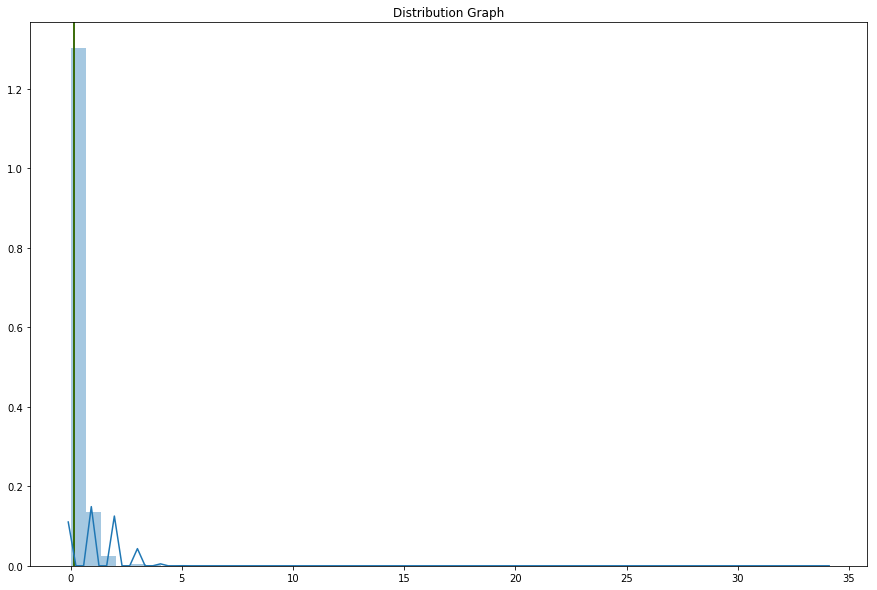

In [112]:
def_30 = np.nan_to_num(application_train['DEF_30_CNT_SOCIAL_CIRCLE'])
explore_numeric(def_30)

#### Preprocessing: 
This feature is highly skewed, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks much more like a normal distribution, with mean and average values near the peak.

Max: 18.57768450130904 Min: 10.152337836193743 Mean: 11.909245341906919 Avg: 11.909245341906919 Std: 0.4889056656307125


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


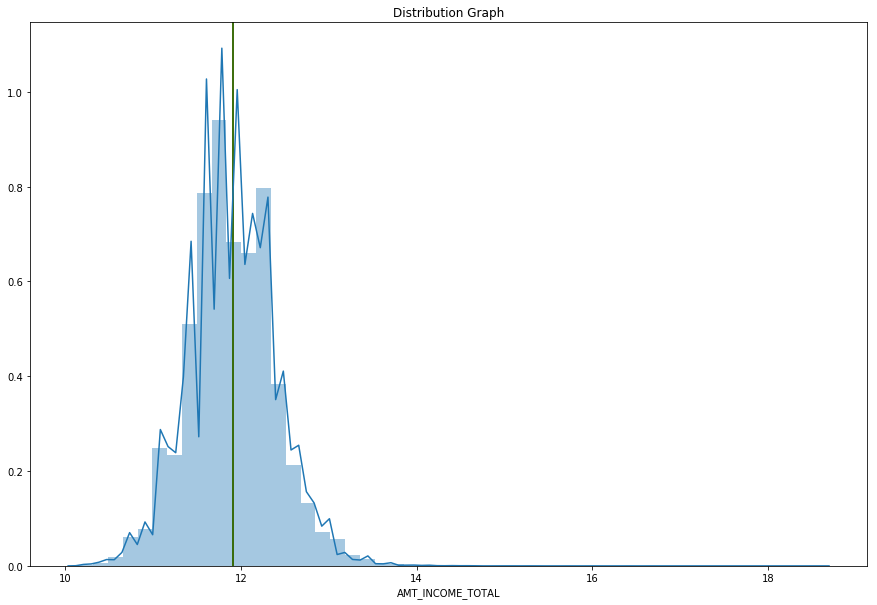

In [113]:
def_30 = application_train['DEF_30_CNT_SOCIAL_CIRCLE']
def_30_transformed = income_total.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(def_30_transformed)

# Swap the normalized data with the original field
application_train['DEF_30_CNT_SOCIAL_CIRCLE_TRANSFORMED'] = income_total_transformed
result = application_train.drop('DEF_30_CNT_SOCIAL_CIRCLE',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('DEF_30_CNT_SOCIAL_CIRCLE_TRANSFORMED')

#### OBS_60_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings with observable 30 DPD (days past due) default

Max: 344.0 Min: 0.0 Mean: 1.4006263190585053 Avg: 1.4006263190585053 Std: 2.3772204007842785


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


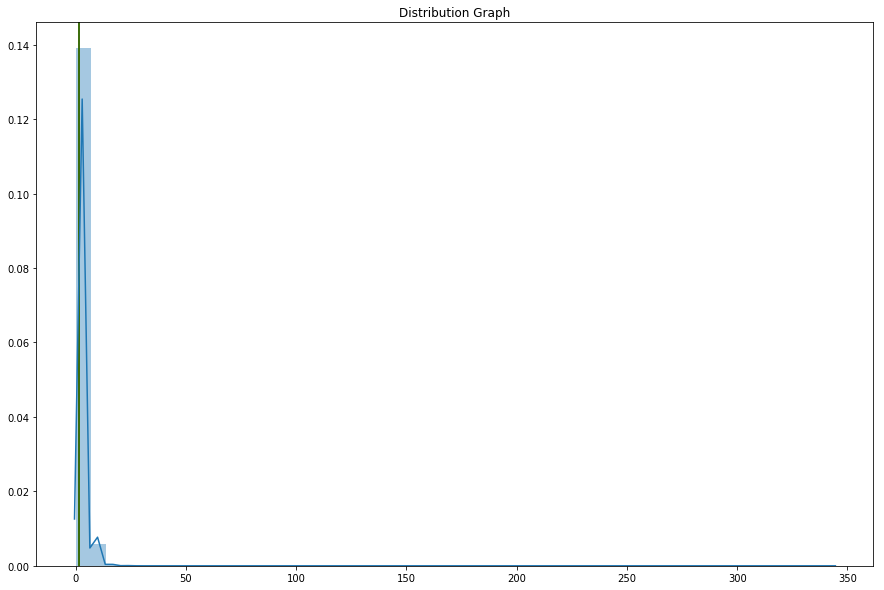

In [114]:
obs_60 = np.nan_to_num(application_train['OBS_60_CNT_SOCIAL_CIRCLE'])
explore_numeric(obs_60)

#### Preprocessing: 
This feature is highly skewed, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks much more like a normal distribution, with mean and average values near the peak.

Max: 18.57768450130904 Min: 10.152337836193743 Mean: 11.909245341906919 Avg: 11.909245341906919 Std: 0.4889056656307125


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


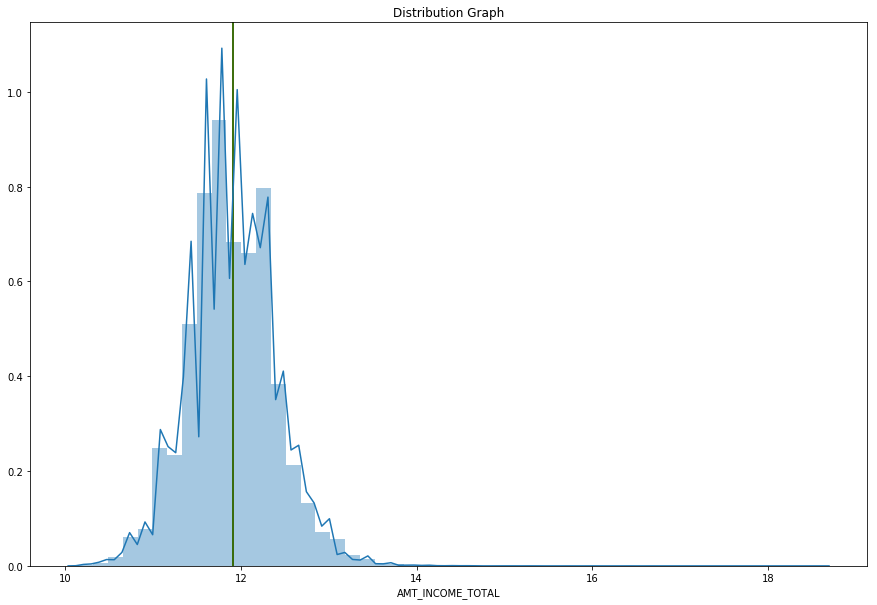

In [115]:
obs_60 = application_train['OBS_60_CNT_SOCIAL_CIRCLE']
obs_60_transformed = income_total.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(obs_60_transformed)

# Swap the normalized data with the original field
application_train['OBS_60_CNT_SOCIAL_CIRCLE_TRANSFORMED'] = income_total_transformed
result = application_train.drop('OBS_60_CNT_SOCIAL_CIRCLE',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('OBS_60_CNT_SOCIAL_CIRCLE_TRANSFORMED')

#### DEF_60_CNT_SOCIAL_CIRCLE
How many observation of client's social surroundings defaulted on 60 DPD (days past due)

Max: 24.0 Min: 0.0 Mean: 0.09971675809971026 Avg: 0.09971675809971026 Std: 0.3617340619658124


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


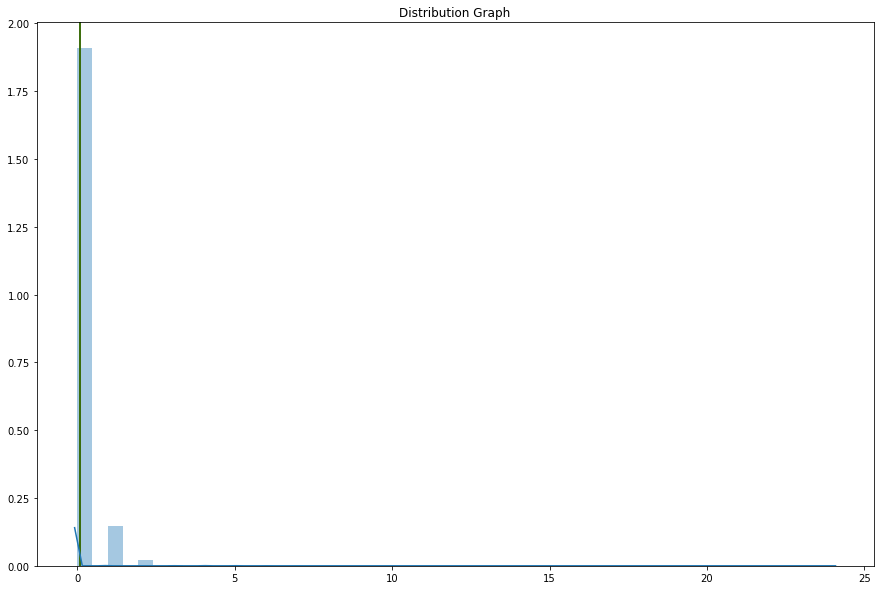

In [116]:
def_60 = np.nan_to_num(application_train['DEF_60_CNT_SOCIAL_CIRCLE'])
explore_numeric(def_60)

#### Preprocessing: 
This feature is highly skewed, in that we have a large number of values near zero, and body of other values distributed across the range.

It's common to do a log transformation for fields like this. The result looks much more like a normal distribution, with mean and average values near the peak.

Max: 18.57768450130904 Min: 10.152337836193743 Mean: 11.909245341906919 Avg: 11.909245341906919 Std: 0.4889056656307125


/Users/jeclark/.local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


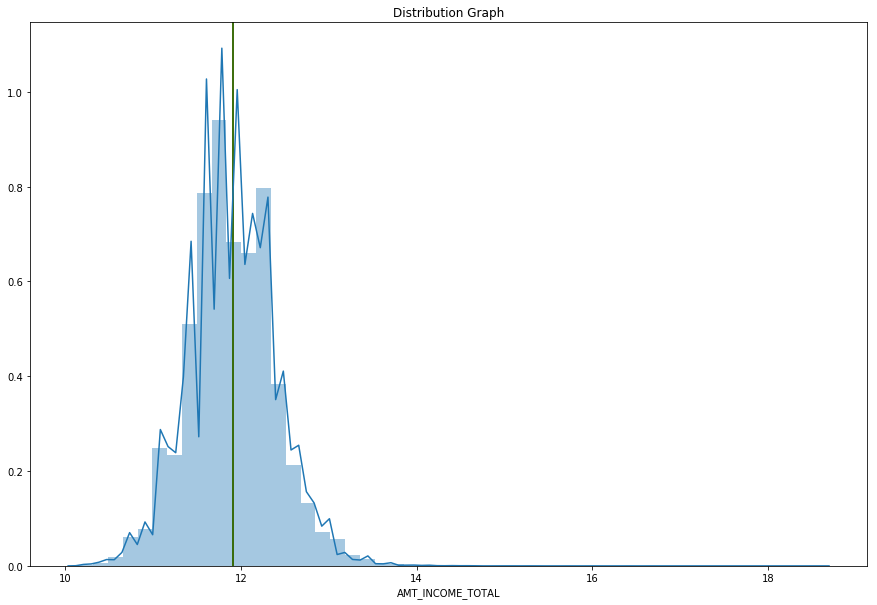

In [117]:
def_60 = application_train['DEF_60_CNT_SOCIAL_CIRCLE']
def_60_transformed = income_total.apply(lambda x: np.log(x + 1))

#visualize the new distribution
explore_numeric(def_60_transformed)

# Swap the normalized data with the original field
application_train['DEF_60_CNT_SOCIAL_CIRCLE_TRANSFORMED'] = income_total_transformed
result = application_train.drop('DEF_60_CNT_SOCIAL_CIRCLE',axis=1)

# Add to our list of numeric features so that we scale the values appropriately later
numeric_features.append('DEF_60_CNT_SOCIAL_CIRCLE_TRANSFORMED')